# Project Introduction

## Objective
This assignment focuses on applying Exploratory Data Analysis (EDA) in a real business context, specifically in risk analytics within the banking and financial services sector. The goal is to understand how data can be leveraged to minimize the risk of financial loss when lending to customers.

## Business Understanding
- Loan providers often face challenges when granting loans to individuals with insufficient or nonexistent credit histories, as some individuals exploit this situation by defaulting on loans.
- In this scenario, you are part of a consumer finance company specializing in lending to urban customers. EDA will be used to analyze data patterns to ensure that applicants capable of repaying the loan are not rejected.
- The company's decision to approve or reject a loan application is associated with two types of risks:
   - Approving a loan to a likely repayer results in a loss of business if not approved.
   - Approving a loan to a likely defaulter may lead to a financial loss.
- The dataset contains information about loan applications and distinguishes between clients with payment difficulties and those without.

## Business Objectives
- The case study aims to identify patterns indicating clients' difficulty in paying installments. These patterns can inform actions like denying loans, reducing loan amounts, or offering loans to risky applicants at higher interest rates.
- The goal is to prevent the rejection of applicants capable of repaying the loan by identifying them through EDA.
- The company seeks to understand the key factors (driver variables) behind loan defaults, which can be used for portfolio and risk assessment.
- Independent research on risk analytics is recommended to gain a better understanding of relevant variables and their significance in this domain.


In [1918]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading file : Application_Data.csv  as DF

In [1919]:
df=pd.read_csv("application_data.csv")

In [1920]:
df.shape

(307511, 122)

## To see the entire output

In [1921]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Checking Null values in DF: Application_Data

In [1922]:
df.isnull().sum()/df.shape[0]*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

## Dropping Columns with more than 40 %percent of NULL values: 

In [1923]:
drop_columns=df.columns[df.isnull().sum()/df.shape[0]*100 > 40]

In [1924]:
drop_columns

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'EMERGE

In [1925]:
df.shape

(307511, 122)

In [1926]:
len(drop_columns)

49

In [1927]:
df.drop(columns=drop_columns,axis=1,inplace=True)

In [1928]:
df.shape

(307511, 73)

### As can be seen we have dropped 49 COLUMNS containing more than 40 percent of NULL values:

In [1929]:
null_col=df.isnull().sum()*100/len(df) 
null_col[null_col >0]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

## Now let's deal with the missing values of every column one by one: 


## 1: AMT_ANNUITY 

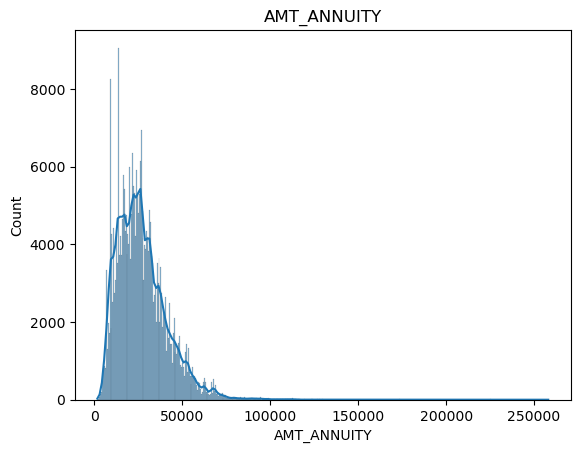

In [1930]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram
sns.histplot(df, x=df['AMT_ANNUITY'], kde=True)
plt.title('AMT_ANNUITY')
plt.show()

Since the Data is Positively skewed,Let's Replace it with median Values 

In [1931]:
df["AMT_ANNUITY"].skew()

1.5797773638612507

In [1932]:
df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median(),inplace=True)

In [1933]:
df["AMT_ANNUITY"].isnull().sum()

0

## 2: AMT_GOODS_PRICE 

Since the Data is Positively skewed,Let's Replace it with median Values 

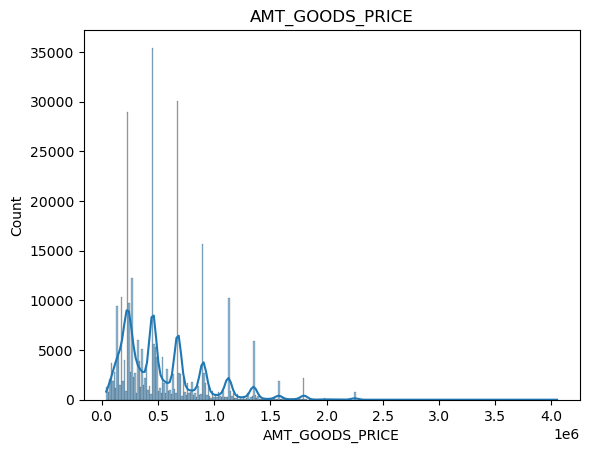

In [1934]:
sns.histplot(df, x=df['AMT_GOODS_PRICE'], kde=True)
plt.title('AMT_GOODS_PRICE')
plt.show()

In [1935]:
df["AMT_GOODS_PRICE"].dtypes

dtype('float64')

In [1936]:
df["AMT_GOODS_PRICE"].fillna(df["AMT_GOODS_PRICE"].median(),inplace=True)

## 3:NAME_TYPE_SUITE
Contain Categorical values. Replace it with mode / Thinking of dropping it.

In [1937]:
df["NAME_TYPE_SUITE"].isnull().sum()

1292

In [1938]:
df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [1939]:
df["NAME_TYPE_SUITE"].mode()[0]

'Unaccompanied'

In [1940]:
df["NAME_TYPE_SUITE"].fillna(df["NAME_TYPE_SUITE"].mode()[0],inplace=True)

In [1941]:
df["NAME_TYPE_SUITE"].isnull().sum()

0

## 4: OCCUPATION_TYPE
In the "ORGANIZATION_TYPE" column, null values are closely associated with the "Pensioner" category, indicating that these null values are likely "Missing At Random."

When analyzing the null values in the "OCCUPATION_TYPE" column, it is evident that the majority of these missing values are related to individuals classified as "Pensioners" under the "Income Type" variable.

Given this strong correlation, imputing the null values in the "OCCUPATION_TYPE" column with the "Pensioner" category is a reasonable data handling strategy based on observed data patterns.


In [1942]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [1943]:
df.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [1944]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [1945]:
df["ORGANIZATION_TYPE"]=df["ORGANIZATION_TYPE"].replace("XNA","Pensioner")

In [1946]:
df.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
Pensioner                 55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [1947]:
df["OCCUPATION_TYPE"].isnull().sum()

96391

In [1948]:
df["OCCUPATION_TYPE"].fillna("Pensioner",inplace=True)

In [1949]:
df["OCCUPATION_TYPE"].isnull().sum()

0

<Axes: >

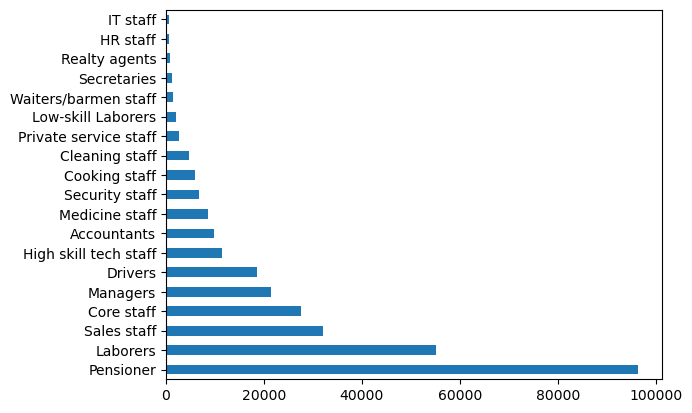

In [1950]:
df.OCCUPATION_TYPE.value_counts().plot.barh()

## 5:  CNT_FAM_MEMBERS           
Fiiling It with MODE

In [1951]:
df["CNT_FAM_MEMBERS"].isnull().sum()

2

In [1952]:
df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].mode,inplace=True)

In [1953]:
df["CNT_FAM_MEMBERS"].isnull().sum()

0

## 6: EXT_SOURCE_2              
Filling Null values with Median as it negativelky skewed and median can be a reasonable choice 

In [1954]:
df["EXT_SOURCE_2"].skew()

-0.7935760449636996

In [1955]:
df["EXT_SOURCE_2"].fillna(df["EXT_SOURCE_2"].median(),inplace=True)

In [1956]:
df["EXT_SOURCE_2"].isnull().sum()

0

## 7: EXT_SOURCE_3

In [1957]:
df["EXT_SOURCE_3"].fillna(df["EXT_SOURCE_3"].median(),inplace=True)

In [1958]:
df["EXT_SOURCE_3"].isnull().sum()

0

## 8: 
#### OBS_30_CNT_SOCIAL_CIRCLE 
#### DEF_30_CNT_SOCIAL_CIRCLE  
#### OBS_60_CNT_SOCIAL_CIRCLE    
#### DEF_60_CNT_SOCIAL_CIRCLE      
These columns represent counts, it might make sense to impute the missing values with zeros, assuming that clients with missing values have no observable or defaulted connections within the specified time frames.

In [1959]:
columns_to_impute = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

for column in columns_to_impute:
    df[column].fillna(0, inplace=True)

## 9: DAYS_LAST_PHONE_CHANGE 
Standardizing Days to Months


In [1960]:
df["DAYS_LAST_PHONE_CHANGE"]=df["DAYS_LAST_PHONE_CHANGE"].abs()

In [1961]:
df["DAYS_LAST_PHONE_CHANGE"]=round(df["DAYS_LAST_PHONE_CHANGE"]/365,0)

In [1962]:
df["DAYS_LAST_PHONE_CHANGE"].fillna(df["DAYS_LAST_PHONE_CHANGE"].mode,inplace=True)


In [1963]:
df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

## 10 :
#### AMT_REQ_CREDIT_BUREAU_HOUR   
#### AMT_REQ_CREDIT_BUREAU_DAY    
#### AMT_REQ_CREDIT_BUREAU_WEEK 
#### AMT_REQ_CREDIT_BUREAU_MON
#### AMT_REQ_CREDIT_BUREAU_QRT     
#### AMT_REQ_CREDIT_BUREAU_YEAR    
When someone applies for a loan, it is common practice for lending institutions, such as banks and financial companies, to conduct a credit inquiry, also known as a credit check, with credit bureaus. Credit bureaus are organizations that collect and maintain credit information on individuals and businesses We can fill the missing values in these columns with median.

In [1964]:
columns_to_fill = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Fill missing values in the specified columns with their respective medians
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())


In [1965]:
null_df=df.columns[df.isnull().sum() >0]
null_df

Index([], dtype='object')

# Data Imbalance check:


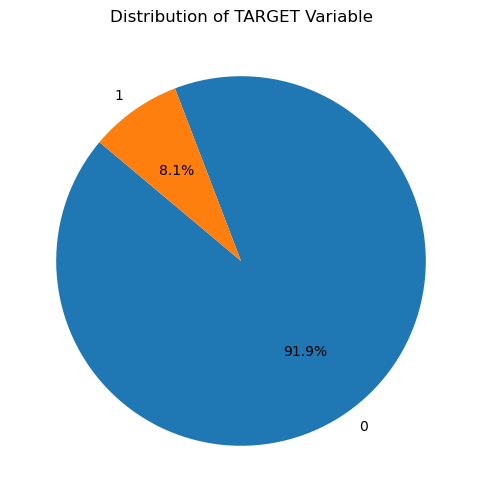

In [1966]:
target_counts = df['TARGET'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of TARGET Variable')
plt.show()

In risk analytics, specifically in the context of credit risk assessment:

- **1** typically represents customers who are classified as "high risk" or those who at higher risk of getting loan default.

- **0** typically represents customers who are classified as "low risk" or those who have a lower risk of defaulting

These values are commonly used to create a binary classification of customers based on their creditworthiness or the likelihood of defaulting on a loan.

## Imbalance Ratio with respect to Repayer(0) and Defaulter(1) is given: 11.345679

# Done Dealing with Null values in df i.e Application_data
# Analysing columns

### 1: Flag Columns 
Combining all the flag into one single entity as it represent number of documents.


In [1967]:
document_columns = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Creating a new column 'NUM_DOCUMENTS_PROVIDED' by summing the values in document_columns
df['NUM_DOCUMENTS_PROVIDED'] = df[document_columns].sum(axis=1)

# dropping the column
df = df.drop(document_columns, axis=1)


### 2: Checking correlation with other columns 

In [1968]:
correlation=df.corr()

In [1969]:
correlation.TARGET.sort_values(ascending=True).head()

EXT_SOURCE_2                 -0.160295
EXT_SOURCE_3                 -0.155892
DAYS_EMPLOYED                -0.044932
AMT_GOODS_PRICE              -0.039623
REGION_POPULATION_RELATIVE   -0.037227
Name: TARGET, dtype: float64

#### Negative correlation Hence dropping it.

In [1970]:
df.drop(columns=["EXT_SOURCE_2","EXT_SOURCE_3"],inplace=True,axis=1)

In [1971]:
df.shape

(307511, 52)

##  Binning 
### A: DAYS_BIRTH to AGE_GROUP

In [1972]:
df.DAYS_BIRTH= abs(df.DAYS_BIRTH)

In [1973]:
df.DAYS_BIRTH=round(df.DAYS_BIRTH/ 365,0)

In [1974]:
df.DAYS_BIRTH.astype(int)

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int32

In [1975]:
# Create bins and labels for age groups
age_bins = [0, 18, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-18', '18-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'AGE_GROUP' based on the bins and labels in df_final
df['AGE_GROUP'] = pd.cut(df.DAYS_BIRTH, bins=age_bins, labels=age_labels)

df.drop("DAYS_BIRTH",inplace=True,axis=1)

In [1976]:
df.AGE_GROUP

0         20-30
1         40-50
2         50-60
3         50-60
4         50-60
          ...  
307506    20-30
307507    50-60
307508    40-50
307509    30-40
307510    40-50
Name: AGE_GROUP, Length: 307511, dtype: category
Categories (10, object): ['0-18' < '18-20' < '20-30' < '30-40' ... '60-70' < '70-80' < '80-90' < '90-100']

### B : AMT_INCOME_TOTAL to INCOME_GROUP

In [1916]:
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [1977]:
income_bins = [25650, 75000, 112500, 135000, 157500, 180000, 202500, 225000, 117000000]
income_labels = ["26k to 75k", "75k to 112.5k", "112.5k to 135k", "135k to 157.5k", "157.5k to 180k", "180k to 202.5k", "202.5k to 225k", "225k to 117M"]

# Creating a new column INCOME_GROUP
df['INCOME_GROUP'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)




In [1978]:
df.INCOME_GROUP.value_counts()

75k to 112.5k     76686
112.5k to 135k    48849
225k to 117M      47118
135k to 157.5k    33628
157.5k to 180k    32529
202.5k to 225k    24420
26k to 75k        23890
180k to 202.5k    20389
Name: INCOME_GROUP, dtype: int64

### C: AMT_CREDIT

In [1757]:
df.AMT_CREDIT.describe()


count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [1979]:
bin_edges = [45000, 270000, 513531, 808650, 1200000, 1600000, 2000000, 2500000, 4050000]
bin_labels = ['45k-270k', '270k-513.5k', '513.5k-808.65k', '808.65k-1.2M', '1.2M-1.6M', '1.6M-2M', '2M-2.5M', '2.5M-4.05M']

# Create a new column 'AMT_CREDIT_GROUP' based on the bins and labels
df['AMT_CREDIT_GROUP'] = pd.cut(df['AMT_CREDIT'], bins=bin_edges, labels=bin_labels, right=False)

In [1980]:
df.AMT_CREDIT_GROUP.value_counts()

270k-513.5k       82480
513.5k-808.65k    73823
45k-270k          71180
808.65k-1.2M      52169
1.2M-1.6M         21161
1.6M-2M            4669
2M-2.5M            1668
2.5M-4.05M          353
Name: AMT_CREDIT_GROUP, dtype: int64

### D: AMT_GOODS_PRICE

In [1981]:
 df.AMT_GOODS_PRICE.describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [1982]:

bin_edges = [40000, 250000, 450000, 680000, 900000, 1200000, 1600000, 2000000, 4050000]
bin_labels = ['40k-250k', '250k-450k', '450k-680k', '680k-900k', '900k-1.2M', '1.2M-1.6M', '1.6M-2M', '2M-4.05M']

df['AMT_GOODS_PRICE_BIN'] = pd.cut(df['AMT_GOODS_PRICE'], bins=bin_edges, labels=bin_labels, right=False)

In [1983]:
df.AMT_GOODS_PRICE_BIN.value_counts()

450k-680k    100021
40k-250k      84891
250k-450k     47066
900k-1.2M     39694
680k-900k     18237
1.2M-1.6M     13200
1.6M-2M        3309
2M-4.05M       1085
Name: AMT_GOODS_PRICE_BIN, dtype: int64

###  E: DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE

In [1984]:
days_column = ["DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]
df[days_column]

,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-637,-3648.0,-2120
1,-1188,-1186.0,-291
2,-225,-4260.0,-2531
3,-3039,-9833.0,-2437
4,-3038,-4311.0,-3458
...,...,...,...
307506,-236,-8456.0,-1982
307507,365243,-4388.0,-4090
307508,-7921,-6737.0,-5150
307509,-4786,-2562.0,-931


These values cannot be negative. hence converting it into positive number and standardizing in years

In [1985]:
df[days_column]=abs(df[days_column])

In [1986]:
df[days_column]=round(df[days_column]/ 365,0)

In [1987]:
df[days_column]= df[days_column].astype(int)

In [1988]:
df.DAYS_EMPLOYED.value_counts().head()

1001    55374
1       34796
2       30530
3       27721
4       22933
Name: DAYS_EMPLOYED, dtype: int64

### Above value represents pensioners. ie 1001. Considering there 40 years of work from age 20 to 60. Replacing them by 45 MAX.


In [1989]:
df.DAYS_EMPLOYED.replace(1001,45,inplace=True)

## E.1 : DAYS_EMPLOYED

In [1990]:
df['EMPLOYMENT_BINS'] = pd.cut(df['DAYS_EMPLOYED'], 
                               bins=[1, 2, 5, 9, 13, 19, 25, 32, 50],  
                               labels=['1-2 years', '2-5 years', '5-9 years', '9-13 years', '13-19 years', '19-25 years', '25-32 years', '32+ years'],  # Assign labels to bins
                               include_lowest=True)  


In [1991]:
df.EMPLOYMENT_BINS.value_counts()

2-5 years      69845
1-2 years      65326
32+ years      57296
5-9 years      51804
9-13 years     25173
13-19 years    16765
19-25 years     7621
25-32 years     3929
Name: EMPLOYMENT_BINS, dtype: int64

## Replacing "XNA" with F due to higher occurence of females

In [1992]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [1993]:
df.CODE_GENDER.replace("XNA","F",inplace=True)

In [1994]:
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

##  FLAG_OWN_CAR
Replacing Y and N with 1 and 0

In [1995]:
df.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [1996]:
df.FLAG_OWN_CAR.replace({"Y":1,"N":0},inplace=True)

In [1997]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_R

# UNIVARIATE ANALYSIS:

In [1998]:
def plot_categorical_distributions_side_by_side(df, column1, column2=None):
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot the first countplot
    sns.countplot(data=df, x=column1, palette='Set1', ax=axes[0])
    axes[0].set_title(f'Distribution of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Count')
    axes[0].set_yscale("log")
    axes[0].tick_params(rotation=45)

    # Plot the second countplot if a second column is provided
    if column2:
        sns.countplot(data=df, x=column2, hue="TARGET", palette='Set1', ax=axes[1])
        axes[1].set_title(f'Distribution of {column2}')
        axes[1].set_xlabel(column2)
        axes[1].set_ylabel('Count')
        axes[1].set_yscale("log")
        axes[1].tick_params(rotation=45)
    
    # Adjust the layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()


## 1: Univariate Analysis for 'AMT_INCOME_TOTAL':

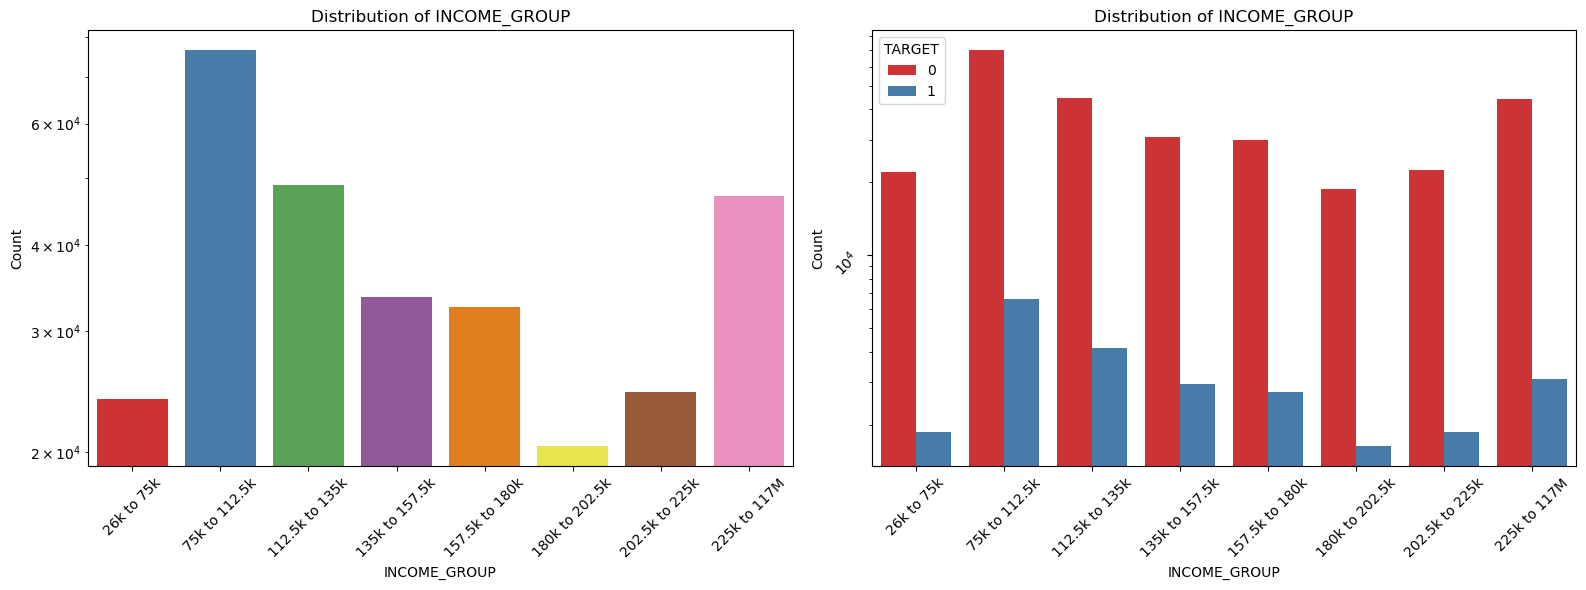

In [1999]:
plot_categorical_distributions_side_by_side(df, 'INCOME_GROUP',"INCOME_GROUP")

#### 1: Majority of people have income between 75k to 112.5k and highest defaulters also lies in this region 

## 2: Univariate Analysis for 'NAME_EDUCATION_TYPE':

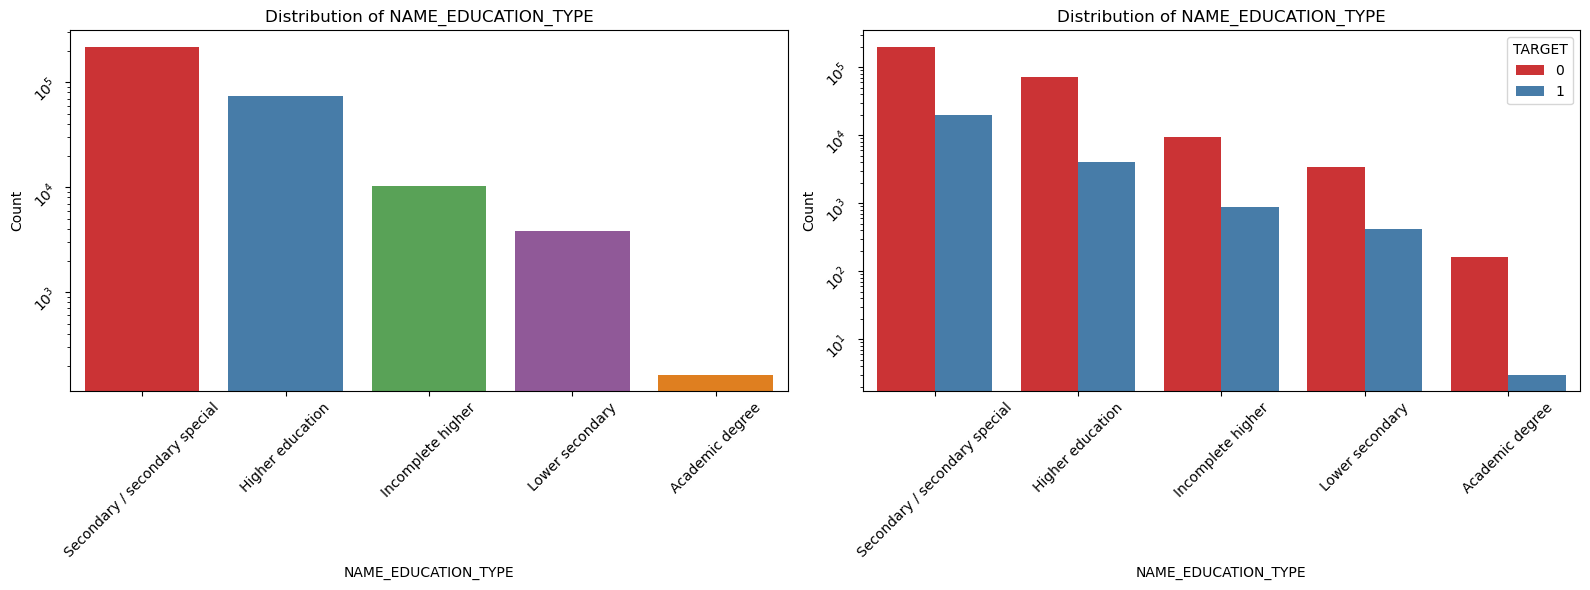

In [2000]:
# Call the function with your DataFrame (df) and the categorical columns you want to plot
plot_categorical_distributions_side_by_side(df, 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE')

### Analysis of Education Types and Default Rates

- The majority of clients in the dataset have completed Secondary/secondary special education.
- Following closely, the second most common education level among clients is Higher education.
- Academic degree holders make up a relatively small portion of the dataset.

### Default Rates by Education Type:

- Among these education groups, clients with Lower secondary education have the highest default rate.
- In contrast, clients with Academic degrees have the lowest default rates.
- It's worth noting that individuals with Academic degrees are the least likely to face issues with loan defaulting.


## 3: Univariate Analysis for ''FLAG_OWN_REALTY":

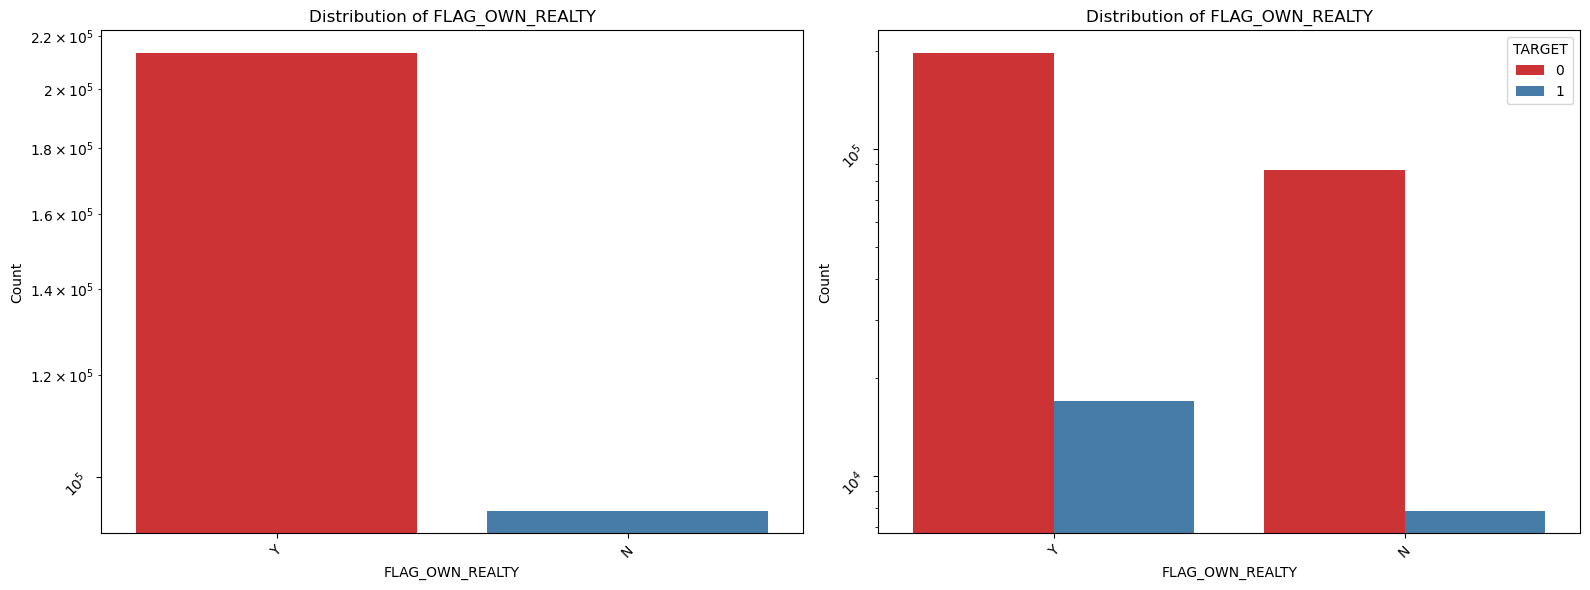

In [2001]:
plot_categorical_distributions_side_by_side(df, 'FLAG_OWN_REALTY',"FLAG_OWN_REALTY")

**Observations on Ownership of Real Estate and Loan Default Rates**

1. Ownership of Real Estate:
   - The majority of clients in the dataset own real estate.
   - Clients who own real estate are more than double in number compared to those who don't own.

3. Inference:
   - Based on the data, there doesn't appear to be a significant correlation between owning real estate and loan defaulting.

## 4: Univariate Analysis for ''CODE_GENDER":

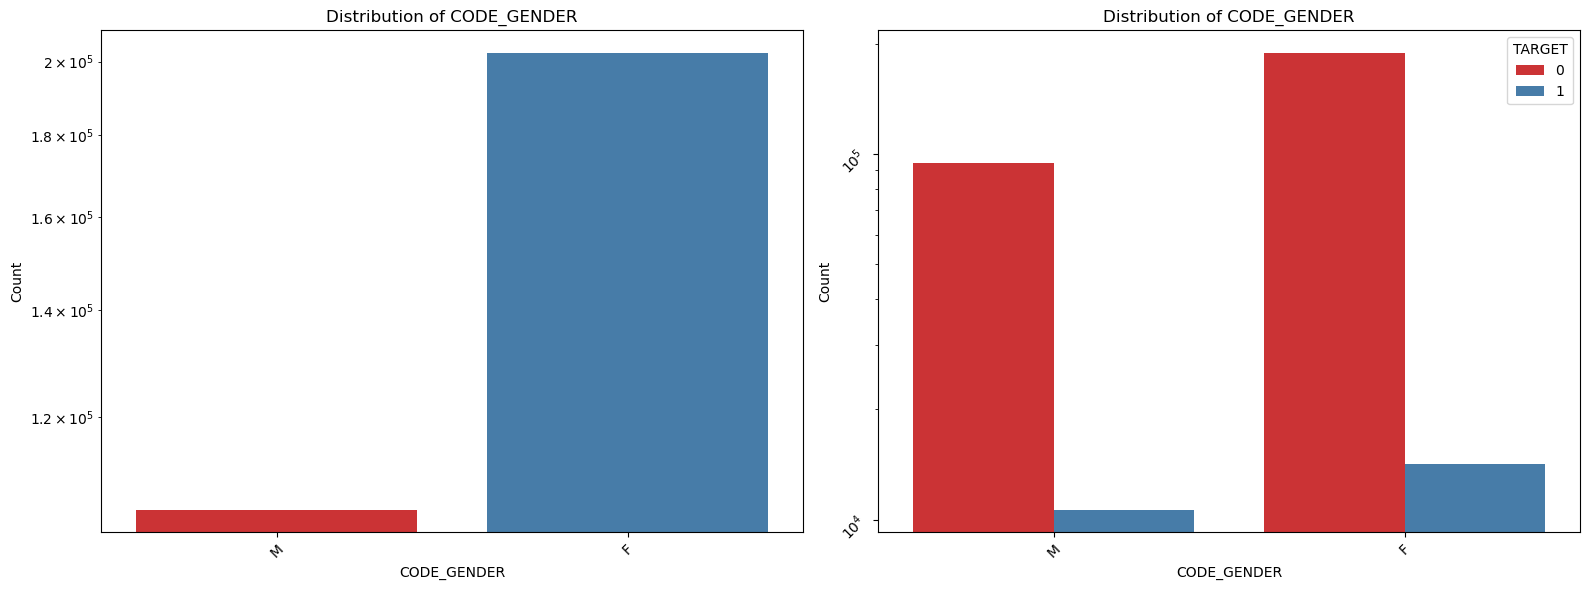

In [2002]:
plot_categorical_distributions_side_by_side(df, 'CODE_GENDER',"CODE_GENDER")

When we look at the data, interesting insights emerge regarding the gender of clients applying for loans:

1. **Gender Distribution:**
   - The dataset comprises almost double the number of female clients compared to male clients. It suggests that there are more female applicants seeking loans.

2. **Loan Default Rates:**
   - Digging deeper into loan default rates, we notice a distinction based on gender:
     - Male clients have a higher likelihood of not repaying their loans, with a default rate.
     - In contrast, female clients exhibit a comparatively lower default rate.
     
These findings imply that gender might play a role in loan default tendencies, with males showing a slightly higher risk of not returning their loans.

## 5: Univariate Analysis for ''REGION_RATING_CLIENT":

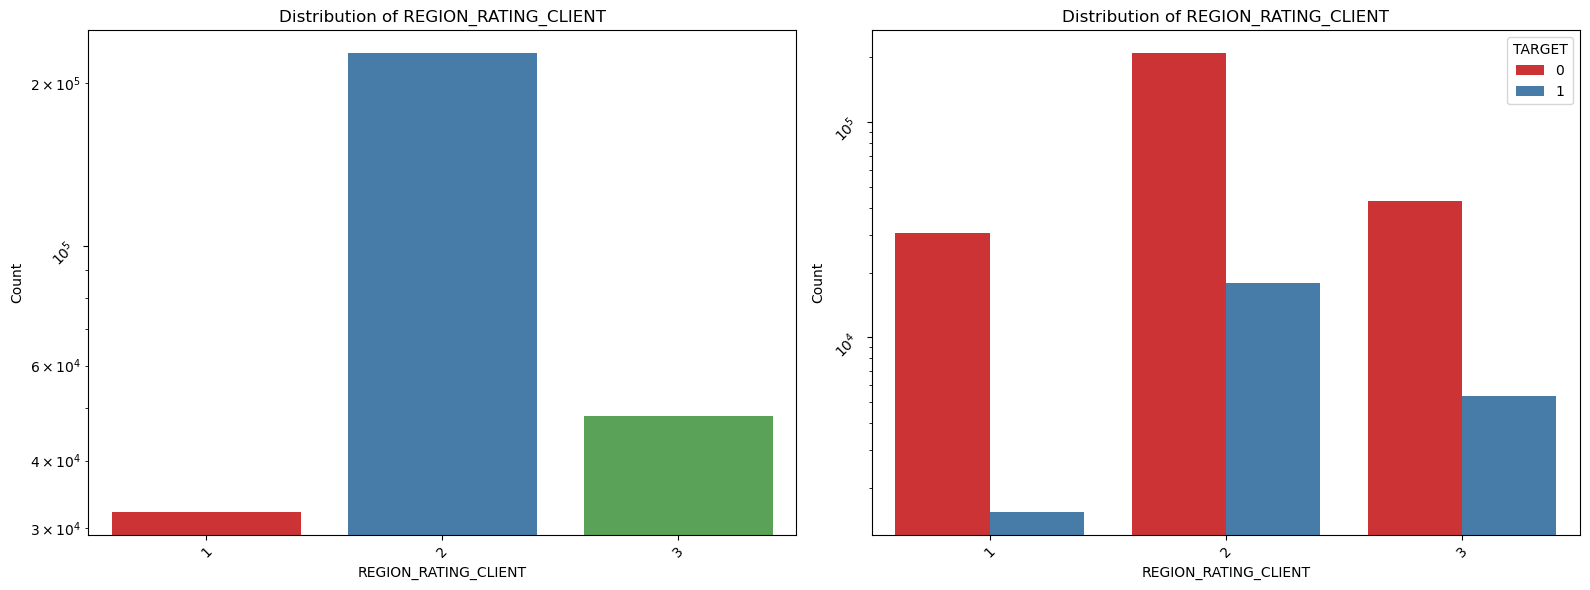

In [2003]:
plot_categorical_distributions_side_by_side(df, 'REGION_RATING_CLIENT',"REGION_RATING_CLIENT")

### Client Region Rating Insights

- Most applicants are concentrated in Region Rating 2.
- Region Rating 1 is associated with the lowest default rate, making it a safer choice for approving loans.


## 6: Univariate Analysis for ''AGE_GROUP":

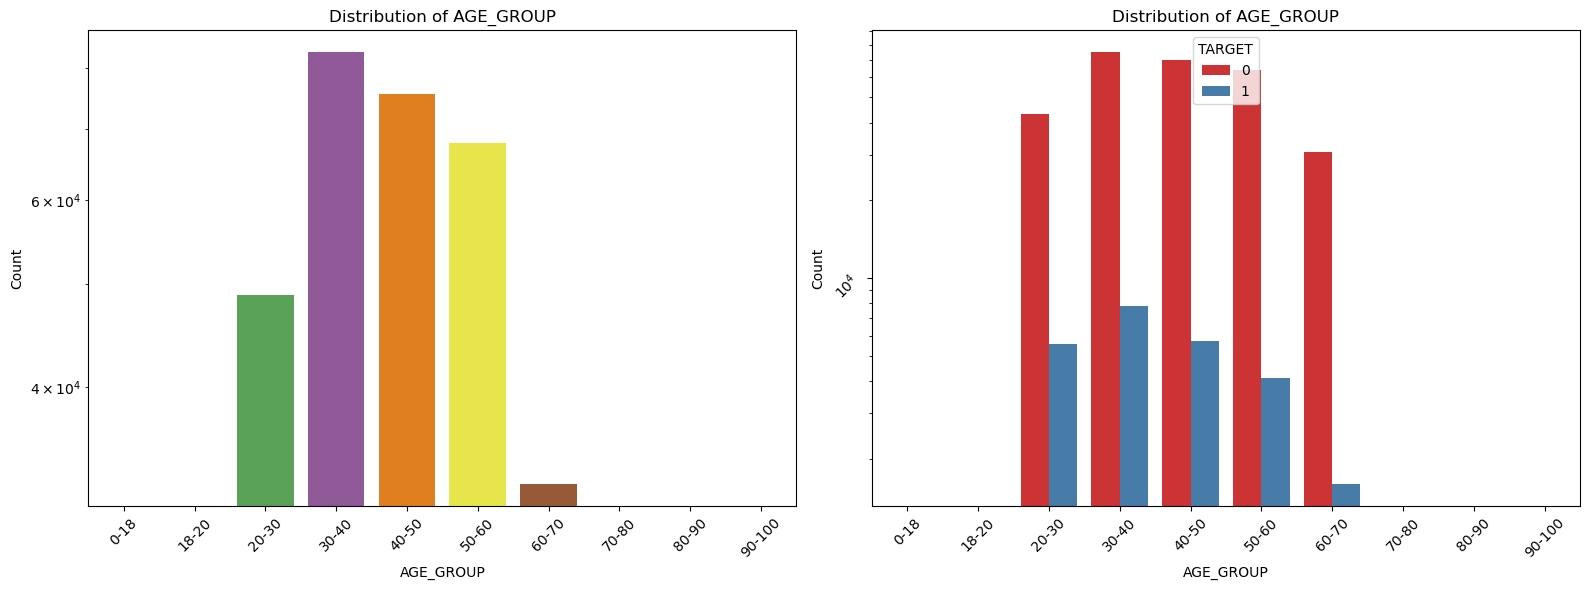

In [2004]:
plot_categorical_distributions_side_by_side(df, 'AGE_GROUP',"AGE_GROUP")

   ### Age Rating Insights

- Most applicants are from age betwewn 30-40
- People with higher age are less defaulting 


## 7: Univariate Analysis for ''DAYS_EMPLOYED":

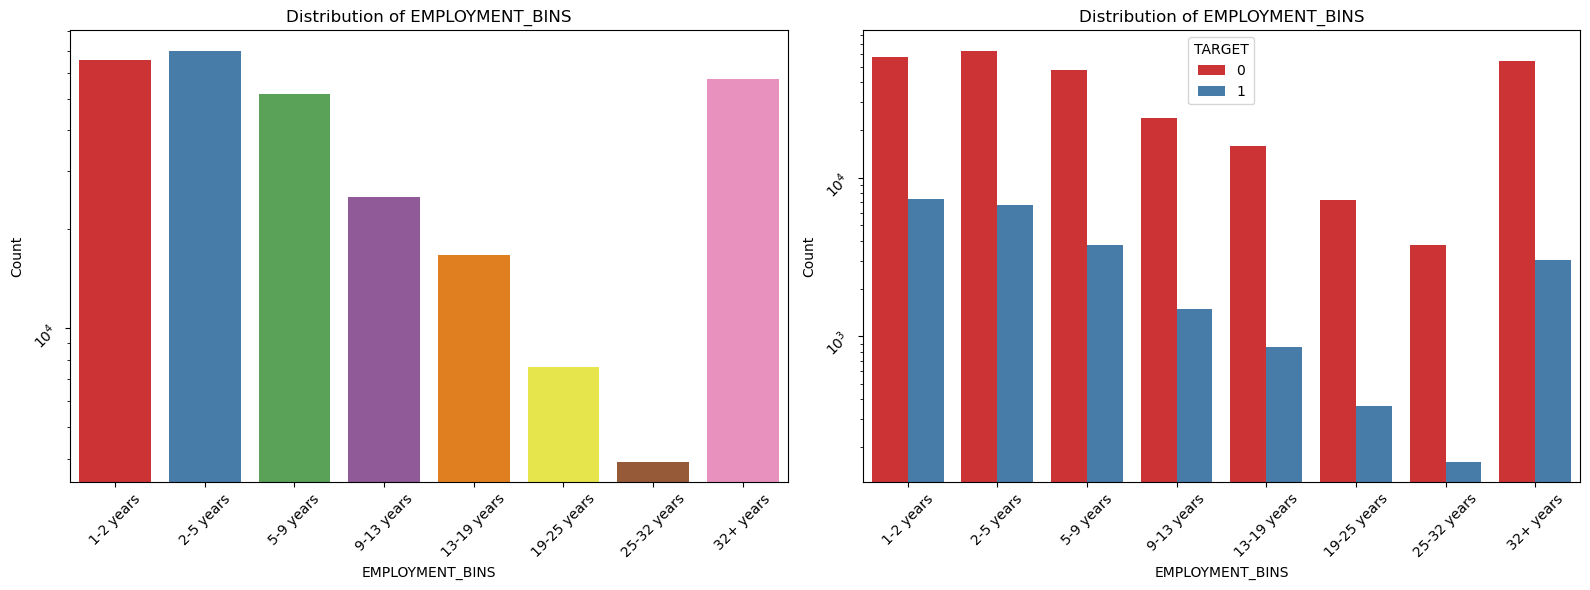

In [2005]:
plot_categorical_distributions_side_by_side(df, 'EMPLOYMENT_BINS',"EMPLOYMENT_BINS")

   ### Days Employement

- Most applicants are having work experience between 1 to 5 years. 
- People with woprk experience between 1-5 years have highest default rate. 
- Pople with least default rate are peopple having experience more than 25+ Years

## 8: Univariate Analysis for ''AMT_CREDIT_GROUP":

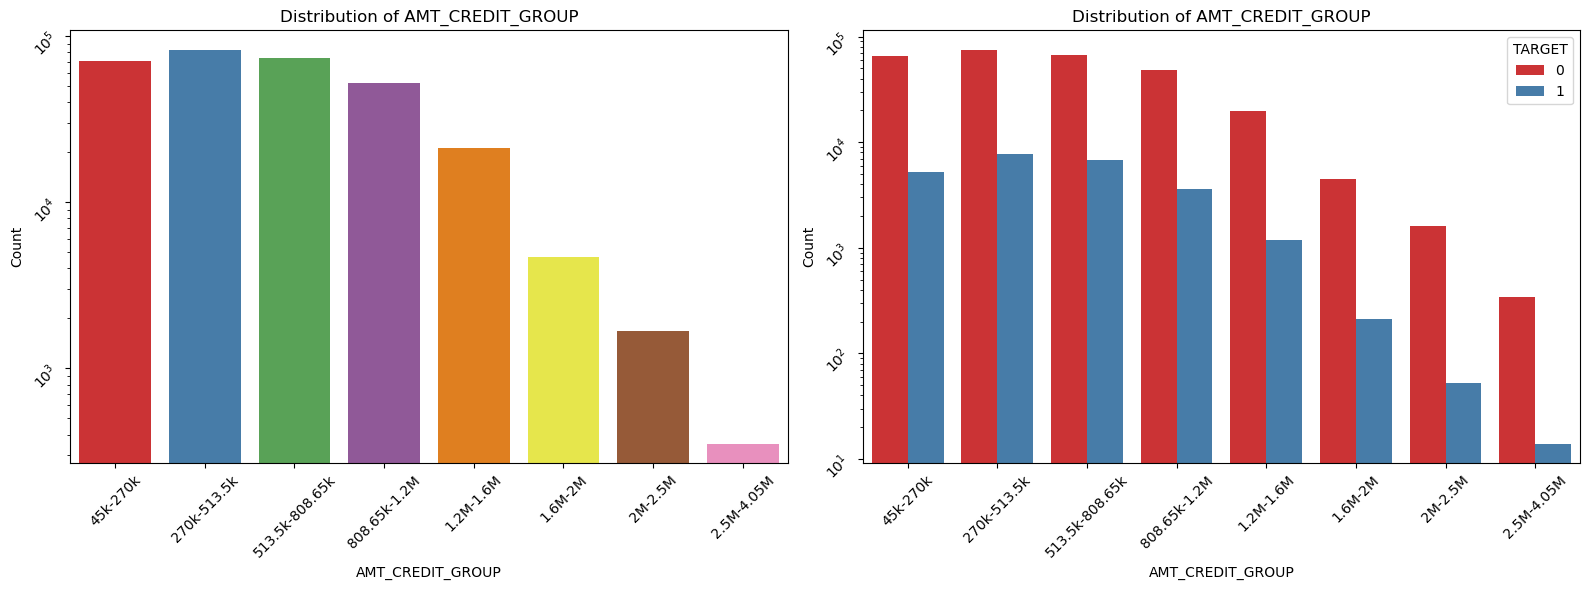

In [2006]:
plot_categorical_distributions_side_by_side(df, 'AMT_CREDIT_GROUP',"AMT_CREDIT_GROUP")


   ### AMT_CREDIT 

- Most of the loan are take between 270k to 513.5k 
- People taking loans between 2.5M to 4.05M have less defaulter rates

## 9: Univariate Analysis for ''CNT_CHILDREN":

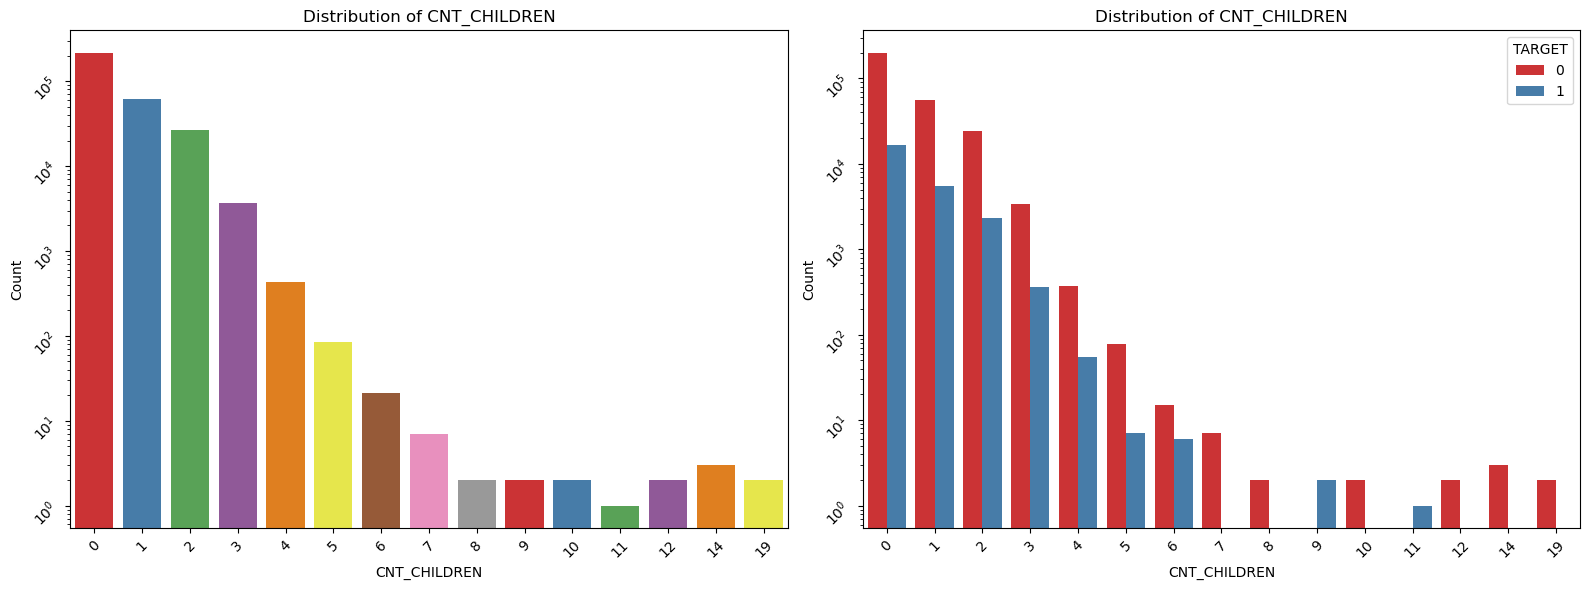

In [2007]:
plot_categorical_distributions_side_by_side(df, 'CNT_CHILDREN',"CNT_CHILDREN")

  ### CNT_Children 

- Majority people with 0 child 
- HIghest defaulter for people having child more than 7


## 10: Univariate Analysis for ''OCCUPATION_TYPE":

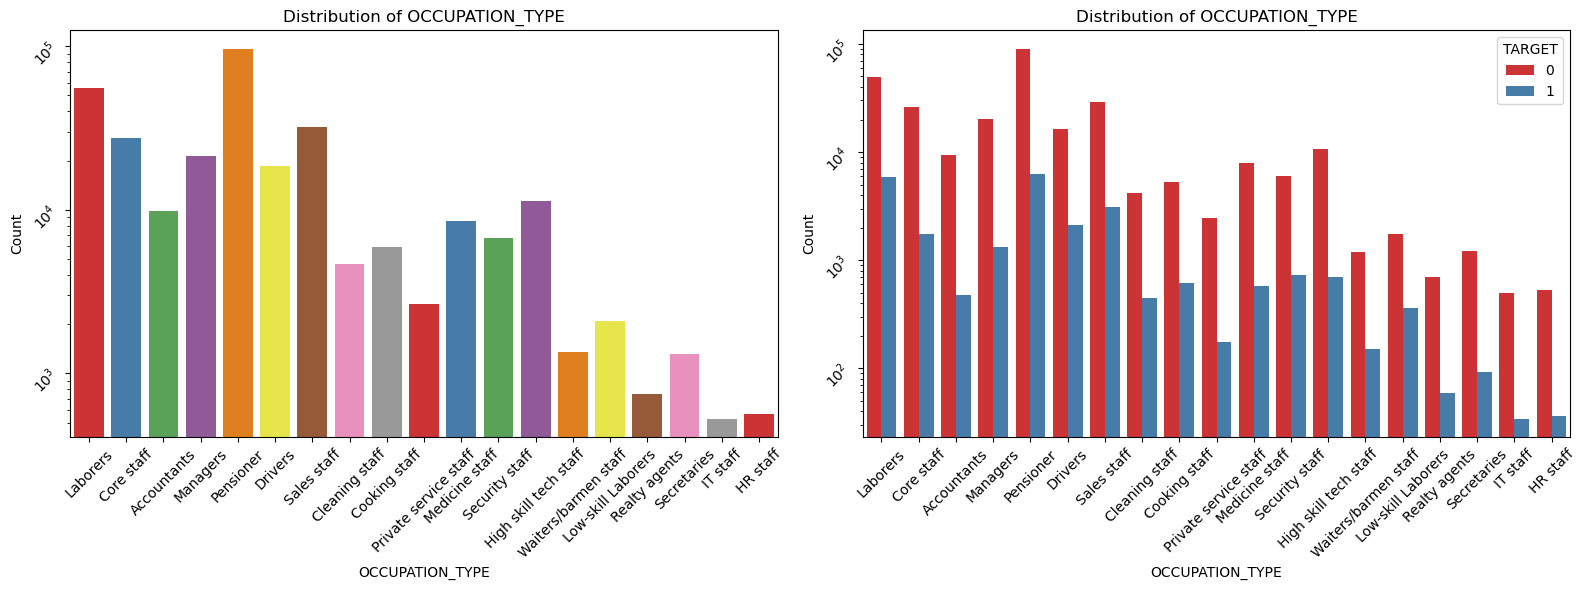

In [2008]:
plot_categorical_distributions_side_by_side(df, 'OCCUPATION_TYPE',"OCCUPATION_TYPE")

### Client Occupation and Loan Default Analysis

1. **Loan Applicant Occupations:**
   - The majority of loan applicants belong to the "Laborers" and "Pensioner" occupation category, followed closely by "Sales Staff."
   - "IT Staff" represents the smallest group of loan applicants.

2. **Loan Default Rates by Occupation:**
   - The occupation category with the highest default rate is "Low-Skill Laborers.
   - Following closely behind are occupation categories such as "Drivers," "Waiters/Barmen Staff," "Security Staff," "Laborers," and "Cooking Staff," all of which have elevated default rates.



## 11: Univariate Analysis for ''NAME_FAMILY_STATUS":

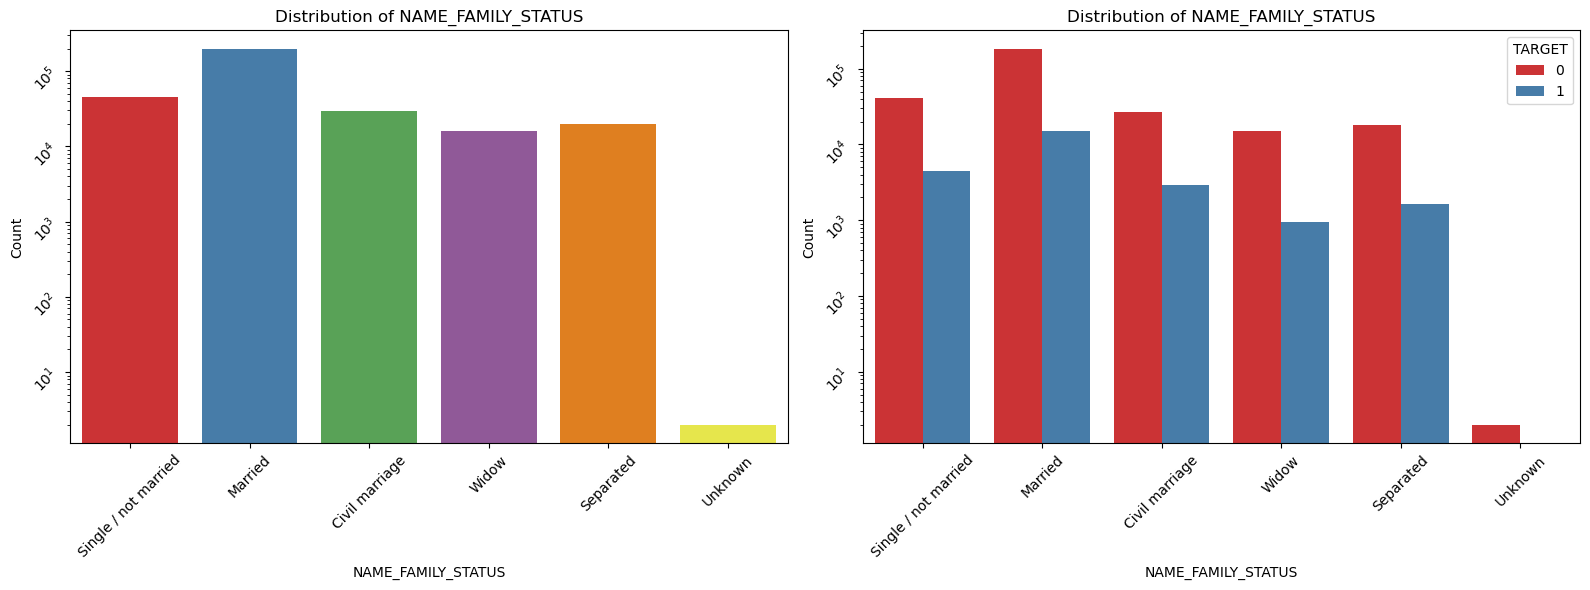

In [2009]:
plot_categorical_distributions_side_by_side(df, 'NAME_FAMILY_STATUS',"NAME_FAMILY_STATUS")

  ### Family Status 

- Married people have taken more loan 
- highest default rate is for civil marriage followed by married peolple

## 12: Univariate Analysis for ''NAME_HOUSING_TYPE" :

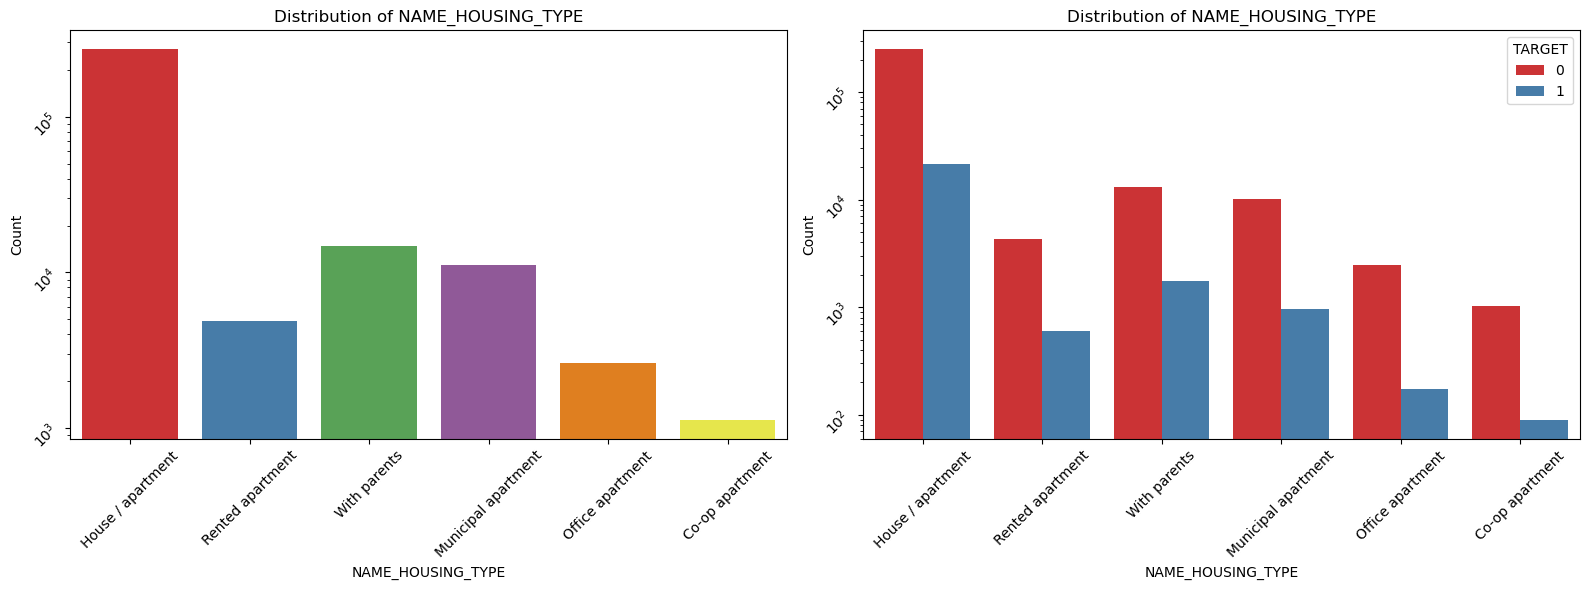

In [2010]:
plot_categorical_distributions_side_by_side(df, 'NAME_HOUSING_TYPE',"NAME_HOUSING_TYPE")

  ### Housing Type 

- Majority of people are living in house/Apartment and major loans are taken by these people and also have highest default.
- People leaving in Co-op Aprtment have the lowest default rate

# Numerical Univariate Analysis : 
#### AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

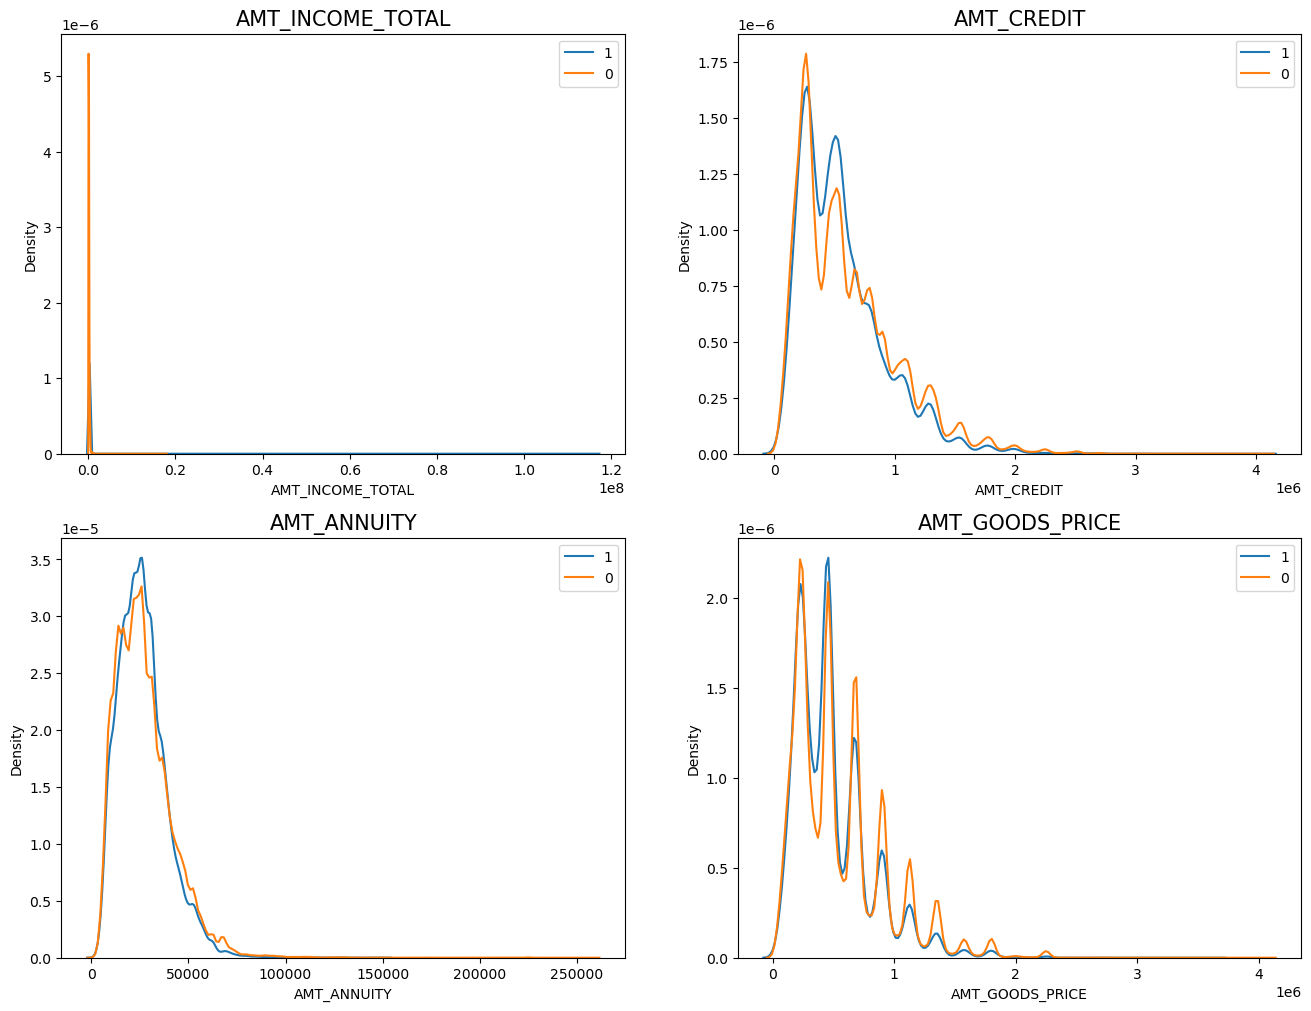

In [2015]:
def plot_bivariate_distributions(df, columns, target_column):
    fig = plt.figure(figsize=(16, 12))
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i + 1)
        sns.distplot(df[df[target_column] == 1][column], hist=False, label="1")
        sns.distplot(df[df[target_column] == 0][column], hist=False, label="0")
        plt.title(column, fontdict={'fontsize': 15, 'fontweight': 5})
        plt.legend()
    plt.show()


selected_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
plot_bivariate_distributions(df, selected_columns, 'TARGET')

### Univariate  Analysis of Numerical variable

In this bivariate analysis, we explore the relationships between various loan features and the loan repayment status (defaulters and repayers).

#### Loan Amount vs. Goods Price

- The majority of loans are granted for goods prices below 1 Million.

#### Annuity vs. Credit Amount

- Most borrowers pay an annuity below 50K for their credit loans.

#### Credit Amount Distribution

- The credit amount of the loan is mostly less than 1 Million .

#### Conclusion

- The distributions of repayers and defaulters overlap in all the plots.
- It is challenging to make a decision based solely on these individual variables.
- Further analysis and possibly additional variables are needed to assess loan repayment risk effectively.


# Bivariate Analysis:

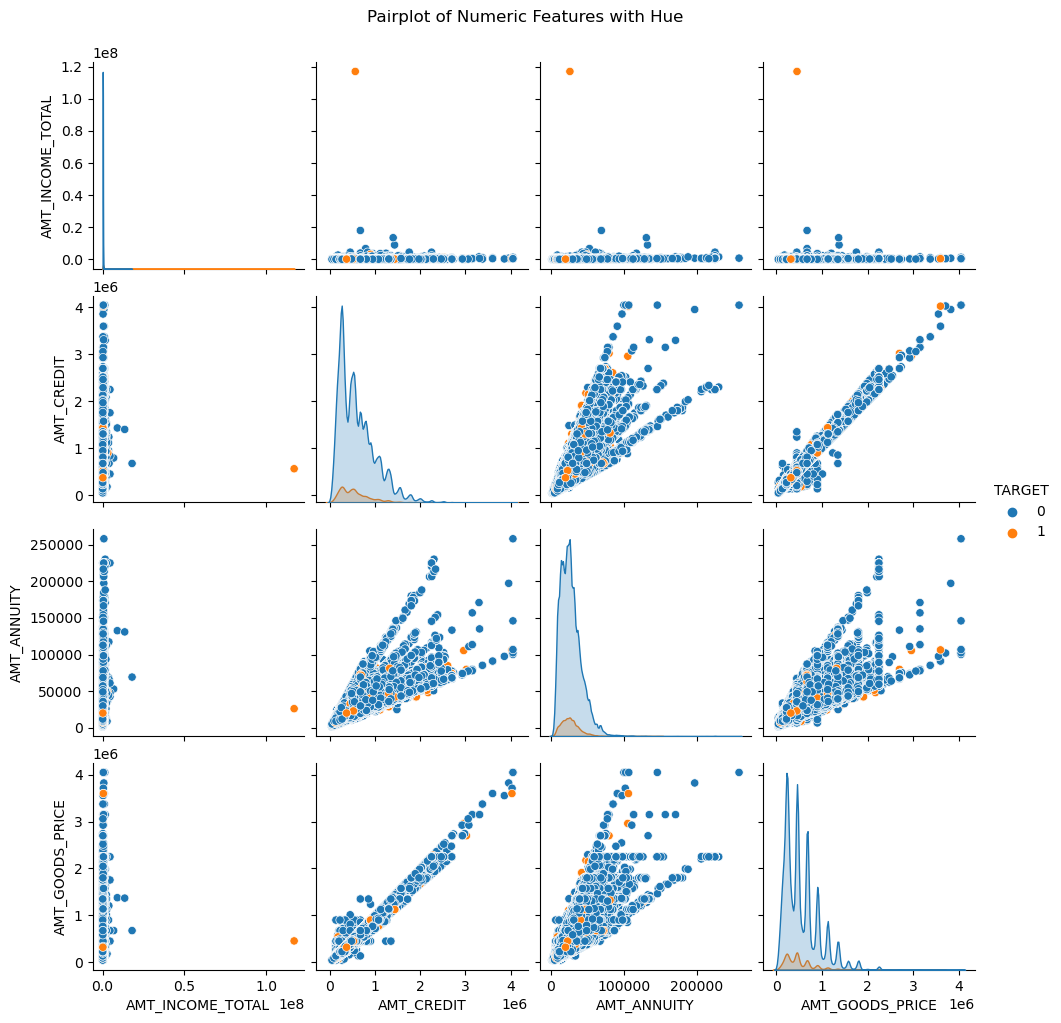

In [2019]:
columns_of_interest = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Create a pairplot with hue as 'TARGET'
sns.pairplot(df, vars=columns_of_interest, hue='TARGET', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features with Hue', y=1.02)
plt.show()

### Loan Default Analysis

1. **Annuity and Goods Price Influence:**
   - When the Annuity Amount is greater than 15k and the Goods Price Amount is greater than 20 lakhs, there appears to be a lower chance of loan defaulters. This suggests that clients with higher annuity and goods price values may be more reliable in terms of loan repayment.

2. **Correlation between Loan Amount and Goods Price:**
   - Loan Amount (AMT_CREDIT) and Goods Price (AMT_GOODS_PRICE) are highly correlated. This is evident from the scatterplot, where most of the data points are consolidated in the form of a line. This high correlation indicates that clients tend to borrow an amount close to the price of the goods they intend to purchase.

3. **Defaulters for High Loan Amounts:**
   - There are very few defaulters for loan amounts exceeding 2 millions. This suggests that clients who borrow larger sums are less likely to default on their loans. It's important to note that this observation is based on the available data and may not imply causation.




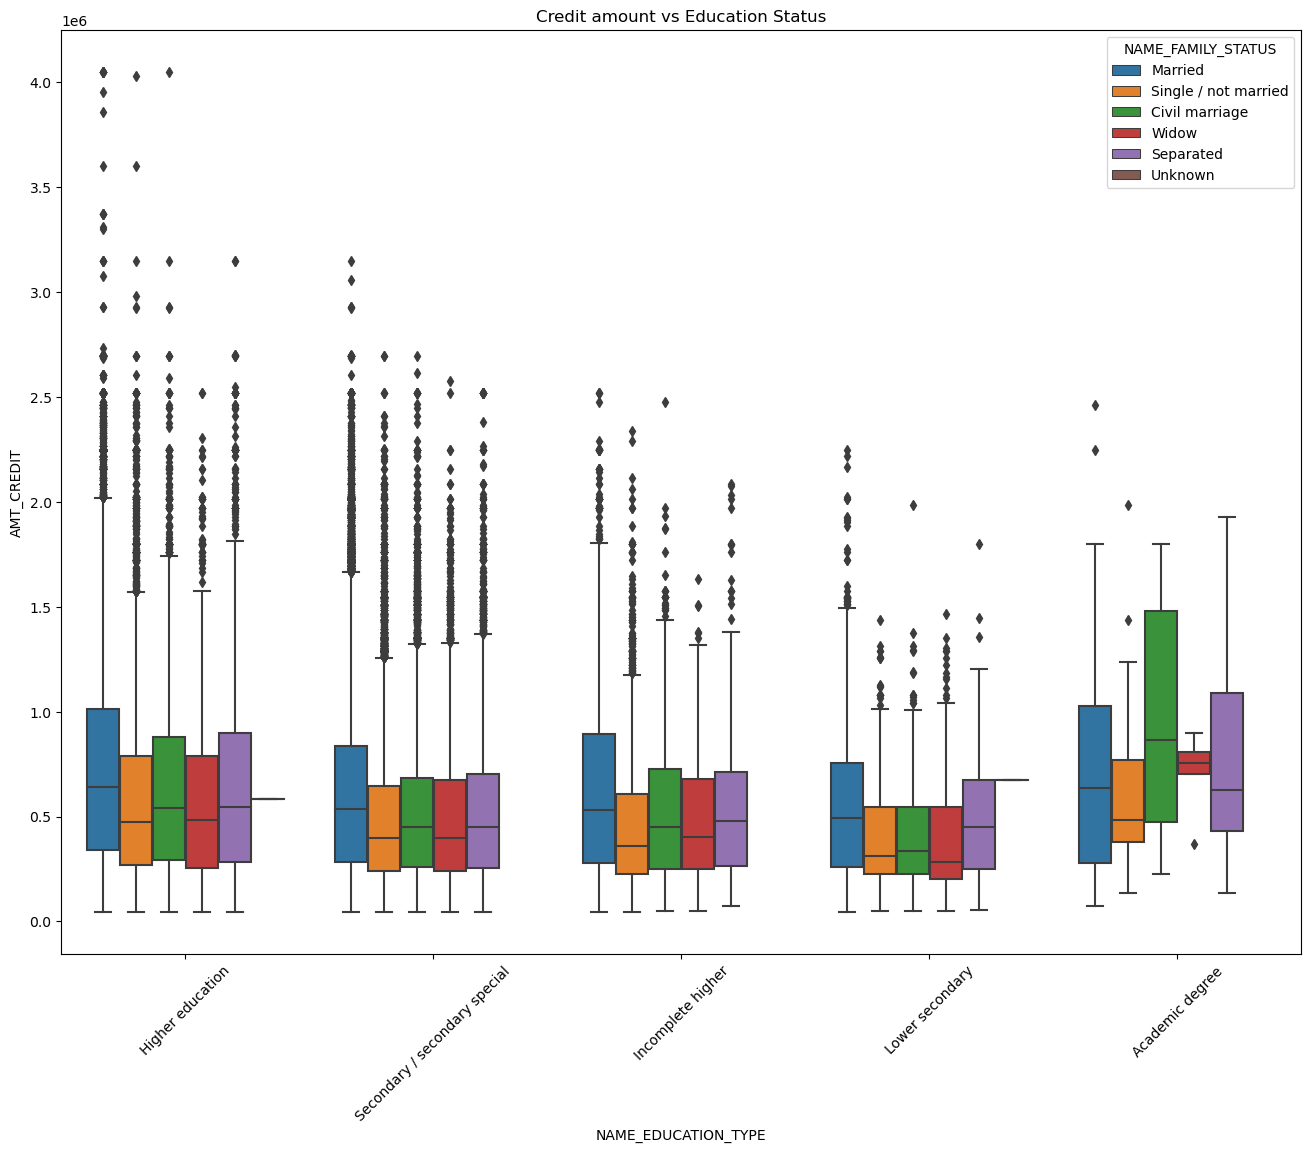

In [2162]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df[df.TARGET==0], x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

### Family Status and Education Analysis

- Clients with family statuses like 'civil marriage,' 'marriage,' and 'separated' who have achieved an 'Academic degree' education tend to have a higher number of credit applications.

- Among clients with 'Higher education,' family statuses such as 'marriage,' 'single,' and 'civil marriage' show more outliers in their credit application amounts, indicating greater variation.

- Notably, clients with 'Civil marriage' status and an 'Academic degree' education primarily fall within the third quartile range, suggesting a preference for higher credit amounts in this group.


# MULTIVARIATE ANALYSIS:

## Removing some unwanted columns: 

In [2039]:
flag_columns = [col for col in df.columns if col.startswith('FLAG')]


In [2040]:
flag_columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [2042]:
df.drop(columns=flag_columns,inplace=True)

## Correlation of People defaulting

In [2068]:
df_corr1=df.loc[df.TARGET == 1]

<Axes: >

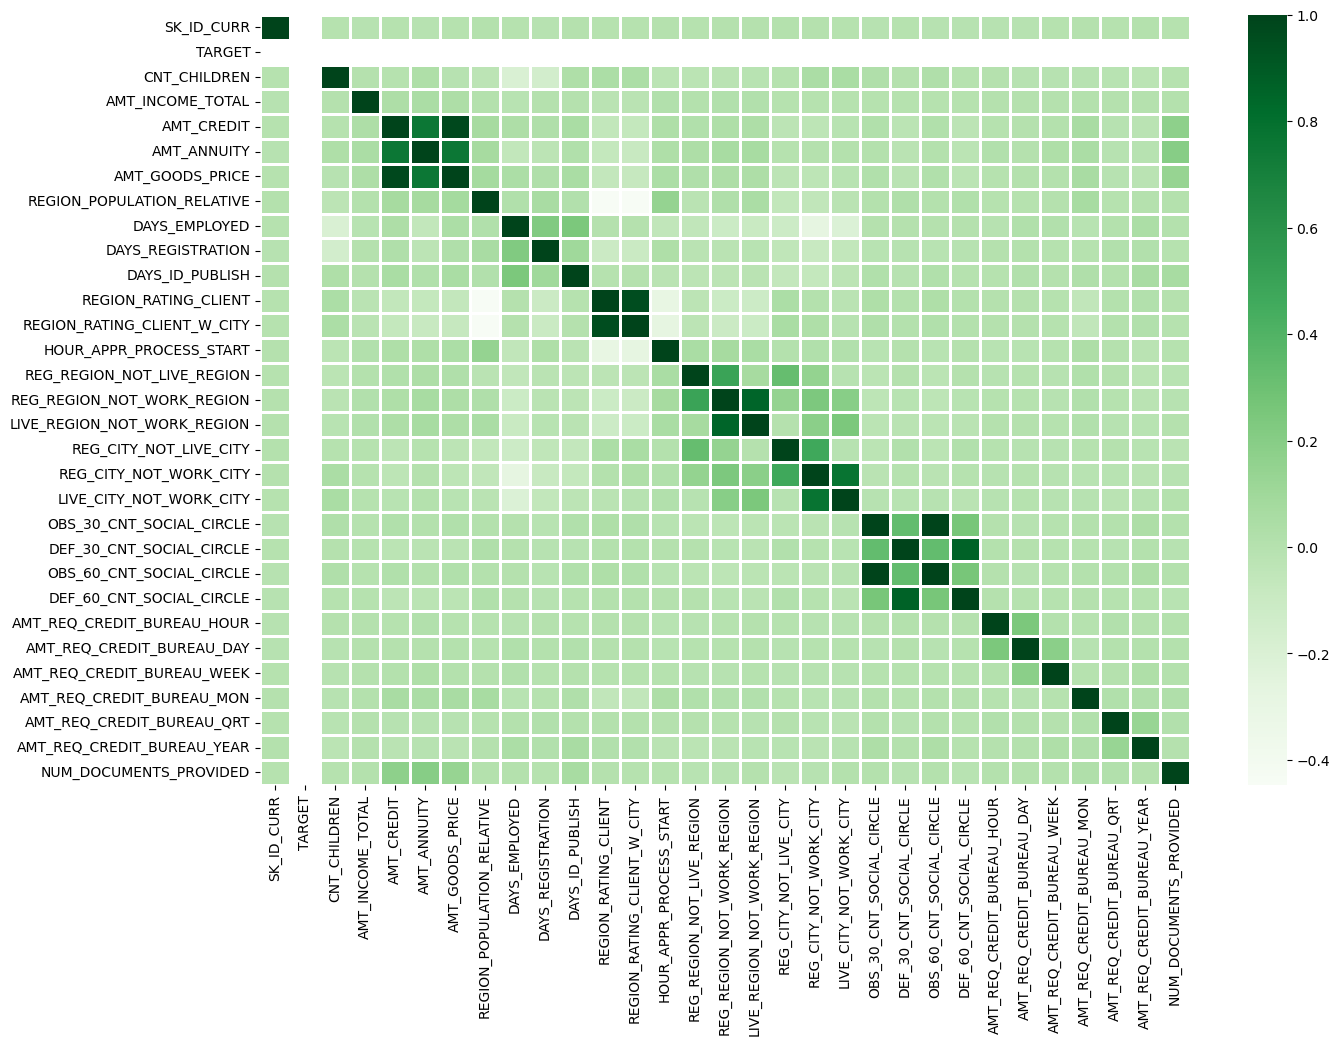

In [2069]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_corr1.corr(),cmap="Greens",linewidths=1)

In [2070]:
df_corr2=df.loc[df.TARGET==0]

<Axes: >

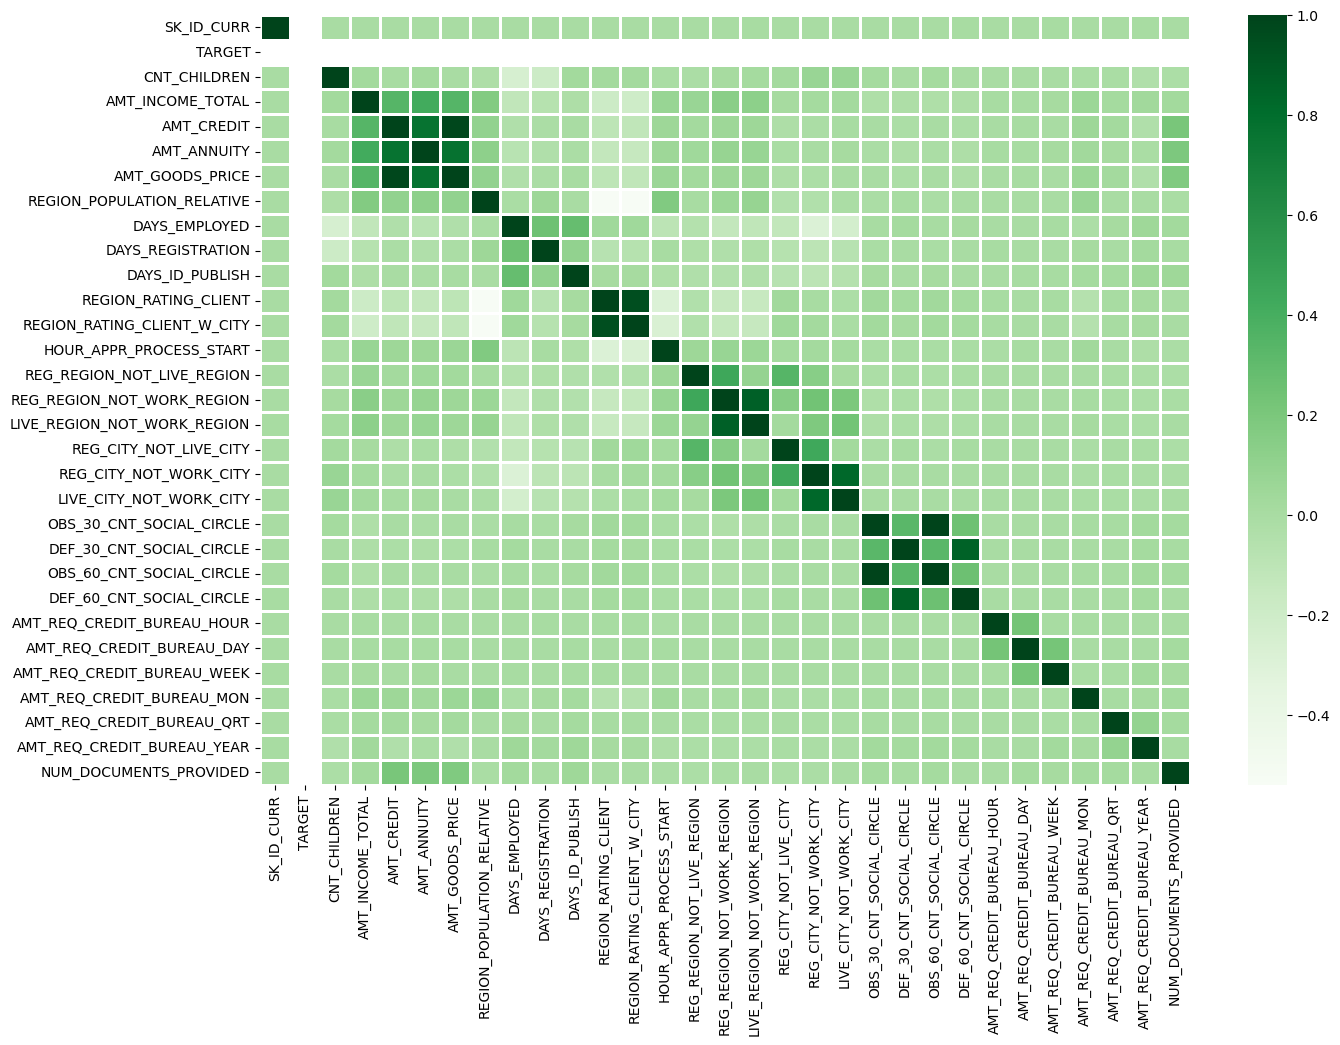

In [2071]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_corr2.corr(),cmap="Greens",linewidths=1)

## Inferences: Correlating Factors 

1. **Credit Amount and Goods Price Correlation:** The credit amount is highly correlated with the goods price amount, and this correlation remains consistent among repayers.

2. **Loan Annuity and Credit Amount Correlation:** The correlation between loan annuity and credit amount shows a slight reduction in defaulters when compared to repayers.

3. **Days Employed Correlation:** Repayers exhibit a higher correlation with the number of days employed when compared to defaulters.

4. **Total Income and Credit Amount Correlation:** Among defaulters, there is a significant drop in the correlation between the total income of the client and the credit amount, whereas among repayers, this correlation remains relatively strong.

5. **Days Birth and Number of Children Correlation:** The correlation between days_birth and the number of children is slightly lower in defaulters compared to repayers.

6. **Social Circle Correlation:** The correlation between the social circle and defaulting shows a slight increase among defaulters compared to repayers.




# Dealing with Null values in DF1 : Previous_application

In [2196]:
df1=pd.read_csv("previous_application.csv")

In [2197]:
NULL_COL=df1.isnull().sum()/len(df1)*100
NULL_COL[NULL_COL >0]

AMT_ANNUITY                  22.286665
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

## Dropping columns with more than 40 % Null values 

In [2198]:
drop_col=df1.columns[df1.isnull().sum()/df1.shape[0]*100 > 40]

In [2199]:
df1.drop(columns=drop_col,inplace=True)

In [2200]:
df1.shape

(1670214, 26)

In [2201]:
null_col=df1.isnull().sum()/df1.shape[0]*100
null_col[null_col> 0]

AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

## Dealing with null values df1 : AMT_ANNUITY                 
Positively skewed: Replacing Null with median 

In [2202]:
df1[df1.AMT_ANNUITY.isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,9,Y,1,XNA,Refused,-239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670187,1971628,435554,Cash loans,NaN,0.0,0.0,NaN,MONDAY,10,Y,1,XNA,Canceled,-134,XNA,XAP,Repeater,XNA,XNA,XNA,Contact center,-1,XNA,NaN,XNA,Cash
1670190,2381880,175920,Cash loans,NaN,0.0,0.0,NaN,FRIDAY,11,Y,1,XNA,Canceled,-243,XNA,XAP,Repeater,XNA,XNA,XNA,Contact center,-1,XNA,NaN,XNA,Cash
1670193,1120445,179433,Revolving loans,NaN,0.0,0.0,NaN,SUNDAY,13,Y,1,XAP,Refused,-365,XNA,HC,Refreshed,XNA,XNA,XNA,AP+ (Cash loan),10,XNA,NaN,XNA,Card Street
1670196,1662123,398290,Consumer loans,NaN,57910.5,57910.5,57910.5,SATURDAY,9,Y,1,XAP,Unused offer,-289,Cash through the bank,CLIENT,Repeater,Mobile,XNA,XNA,Country-wide,96,Connectivity,NaN,XNA,POS mobile with interest


When we see above deatils where AMT_ANNUTIY is null we can see the the loan status is either cancelled or refused or unused order. Replacing those values with 0 

In [2203]:
# Define the list of specified values
specified_values = ["Canceled", "Refused", "Unused offer"]
df1.loc[df1['NAME_CONTRACT_STATUS'].isin(specified_values), 'AMT_ANNUITY'] = 0

In [2204]:
df1.shape

(1670214, 26)

Replaving with median values remaining values

In [2205]:
df1.AMT_ANNUITY.fillna(df1.AMT_ANNUITY.median(),inplace=True)

In [2206]:
df1.shape

(1670214, 26)

## Dealin with null values df1 : PRODUCT_COMBINATION
Categorical : Replacing NULL with MODE 

In [2207]:
df1["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [2208]:
df1["PRODUCT_COMBINATION"].fillna(df1["PRODUCT_COMBINATION"].mode()[0],inplace=True)

In [2209]:
df1["PRODUCT_COMBINATION"].isnull().sum()

0

## Dealing with Null Values: AMT_GOODS_PRICE 

In [2210]:
df1.corr()['AMT_GOODS_PRICE']

SK_ID_PREV                 0.015293
SK_ID_CURR                 0.000369
AMT_ANNUITY                0.425741
AMT_APPLICATION            0.999884
AMT_CREDIT                 0.993087
AMT_GOODS_PRICE            1.000000
HOUR_APPR_PROCESS_START   -0.045267
NFLAG_LAST_APPL_IN_DAY    -0.017100
DAYS_DECISION              0.290422
SELLERPLACE_AREA          -0.015842
CNT_PAYMENT                0.672129
Name: AMT_GOODS_PRICE, dtype: float64

AMT_GOODS_PRICE' has a high correlation with 'AMT_CREDIT' and 'AMT_APPLICATION,' it's reasonable to consider filling missing values in 'AMT_GOODS_PRICE' based on these related columns.
The use of the median provides a robust imputation method, especially if the data distribution is skewed.

In [2211]:
# Calculate the median for each unique combination of 'AMT_APPLICATION' and 'AMT_CREDIT'
median_goods_price = df1.groupby(['AMT_APPLICATION', 'AMT_CREDIT'])['AMT_GOODS_PRICE'].median().reset_index()

# Merge the calculated medians back to the main dataframe to fill missing values
df1 = df1.merge(median_goods_price, on=['AMT_APPLICATION', 'AMT_CREDIT'], how='left', suffixes=('', '_median'))

# Fill missing 'AMT_GOODS_PRICE' values with the calculated medians
df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE_median'], inplace=True)

# Drop the redundant median column
df1.drop(columns=['AMT_GOODS_PRICE_median'], inplace=True)


In [2212]:
df1["AMT_GOODS_PRICE"].isnull().sum()

1533

Filling Remaining with median Values 

In [2213]:
df1["AMT_GOODS_PRICE"].fillna(df1["AMT_GOODS_PRICE"].median(),inplace=True)

In [2214]:
df1["AMT_GOODS_PRICE"].isnull().sum()

0

## Dealing with Null Values: CNT_PAYMENT
Filled with MEDIAN

In [2215]:
missing_payment_df1 = df1[df1['CNT_PAYMENT'].isnull() | (df1['CNT_PAYMENT'] == 0)]

# Examine unique values in NAME_CONTRACT_STATUS
status_counts1 = missing_payment_df1['NAME_CONTRACT_STATUS'].value_counts()
print(status_counts1)

Canceled        306278
Approved         97775
Refused          87636
Unused offer     25526
Name: NAME_CONTRACT_STATUS, dtype: int64


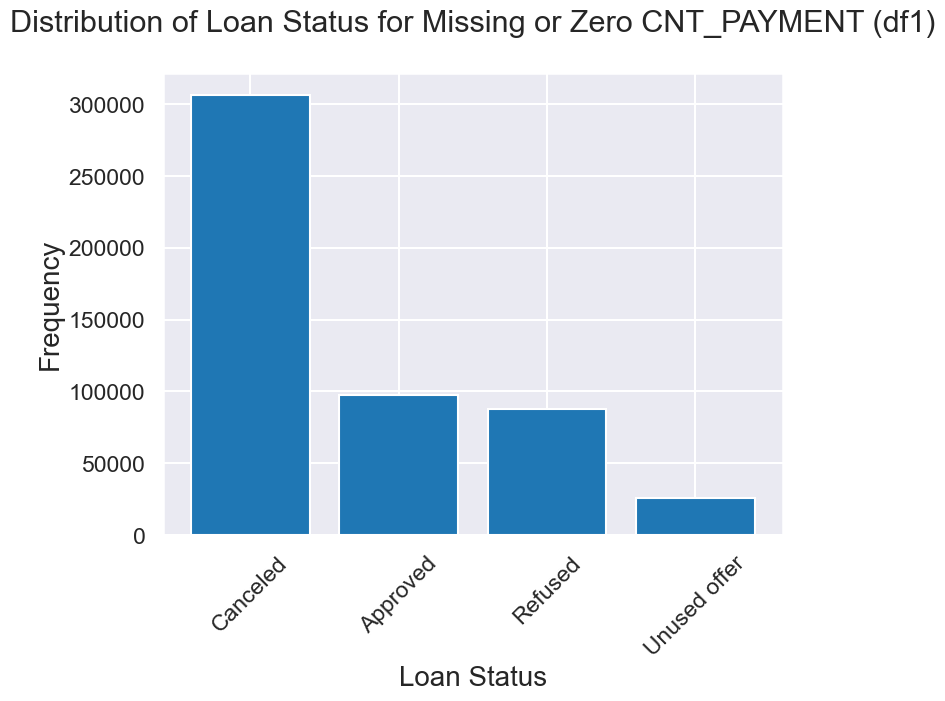

In [2216]:
plt.figure(figsize=(8, 6))
plt.bar(status_counts1.index, status_counts1.values)
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status for Missing or Zero CNT_PAYMENT (df1)')
plt.xticks(rotation=45)
plt.show()

In [2217]:
df1['CNT_PAYMENT'].fillna(0, inplace=True)


## Remaing Null Values

In [2218]:
null_col_df1=df1.isnull().sum()/len(df1)*100
null_col_df1[null_col_df1 >0]

AMT_CREDIT    0.00006
dtype: float64

In [2219]:
df1.shape

(1670214, 26)

# Analysis of DF1 : Previous Application


# 1: NAME_CONTRACT_STATUS

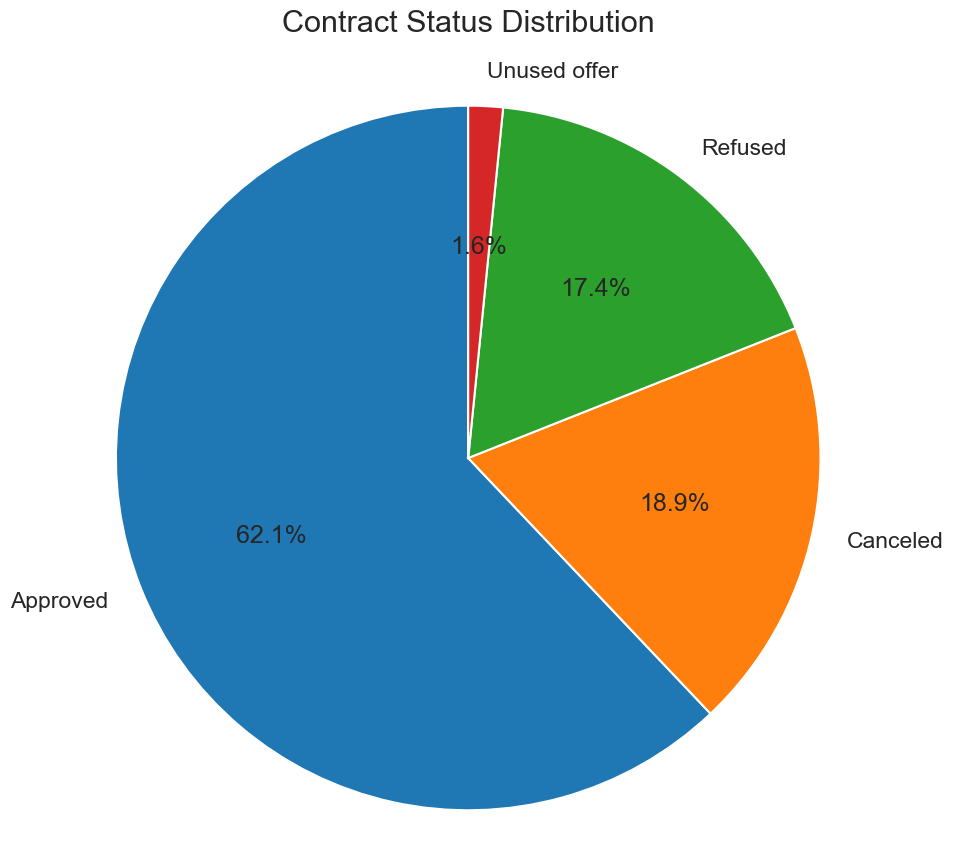

In [2224]:
data = df1['NAME_CONTRACT_STATUS'].value_counts()

# Create a Pie chart
plt.figure(figsize=(10, 10))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle

plt.axis('equal')
plt.title('Contract Status Distribution')
plt.show()


1. **Approved (62.07%)**: The majority of loan applications were successfully approved, indicating a healthy lending rate.

2. **Canceled (18.94%)**: Approximately 19% of applicants canceled their loan requests, suggesting the need to explore reasons for such cancellations.

3. **Refused (17.40%)**: About 17% of applications were denied, highlighting the importance of assessing rejection criteria and applicant profiles.

4. **Unused Offer (1.58%)**: A small percentage received offers but didn't proceed, warranting investigation into factors influencing this decision.

This analysis provides insights for optimizing the lending process and mitigating default risks.


# 2: NAME_CLIENT_TYPE

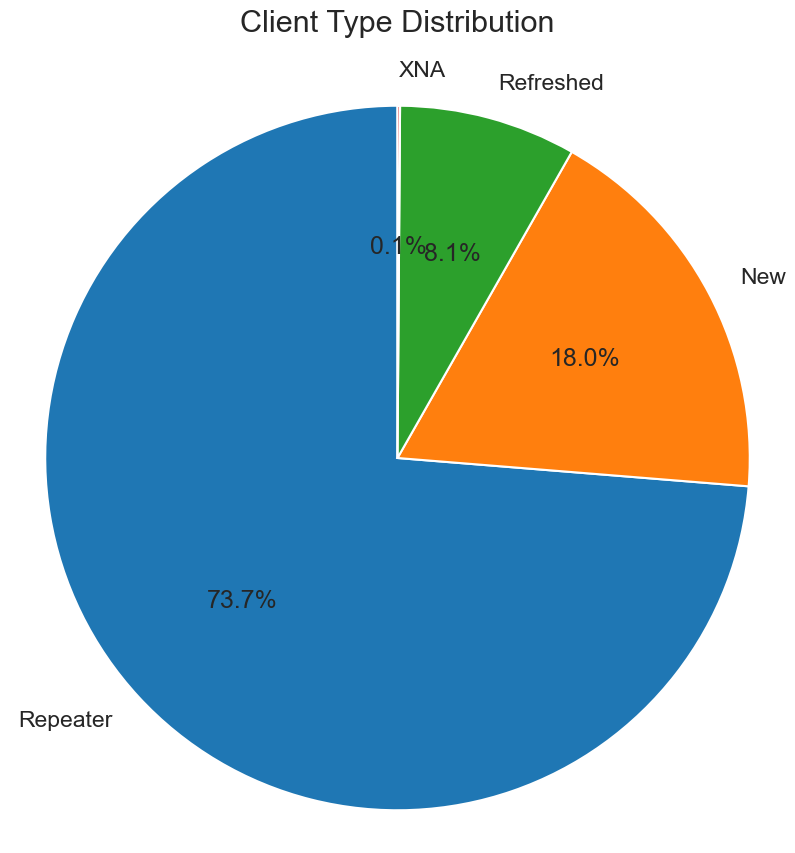

In [2222]:
data = df1['NAME_CLIENT_TYPE'].value_counts()

# Create a Pie chart
plt.figure(figsize=(10, 10))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Client Type Distribution')
plt.show()

- **Repeater**: 73.7% of clients fall into this category.
- **New**: Approximately 18.0% of clients are categorized as "New."
- **Refreshed**: About 8.1% of clients are classified as "Refreshed."
- **XNA**: A very small percentage, only 0.1%, is labeled as "XNA."


# 3: NAME_CONTRACT_TYPE

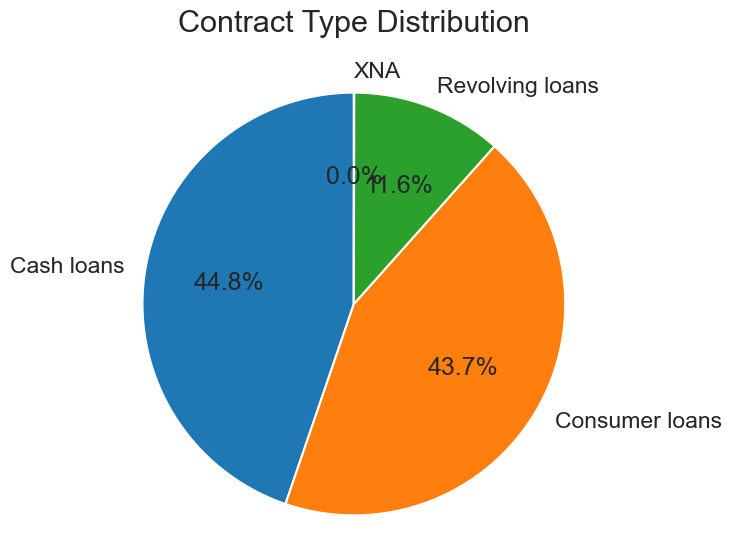

In [2228]:
data = df1['NAME_CONTRACT_TYPE'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Contract Type Distribution')
plt.show()

### Contract Type Distribution

Let's analyze the distribution of contract types in the dataset. Contract types indicate the various types of loans offered by the company and their respective percentages:

- **Cash loans**: The most common contract type, accounting for 44.76% of all contracts.

- **Consumer loans**: A significant portion of contracts, making up 43.66% of the total.

- **Revolving loans**: Less common, representing 11.57% of contracts. Typically associated with credit cards or lines of credit.

- **XNA**: An extremely rare category, making up only 0.02% of the contracts. The exact meaning of "XNA" is unclear.



## Insights from Previous Application Data

1. **Outliers in Financial Variables:**
   - It is evident that several financial variables, namely AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, and SELLERPLACE_AREA, contain a substantial number of outliers. These outliers indicate significant variations in loan and purchase amounts, which should be carefully considered in further analysis.

2. **Outliers in Payment Count (CNT_PAYMENT):**
   - The variable CNT_PAYMENT displays a few outlier values. These outliers suggest deviations from the typical payment counts associated with previous loan applications. Exploring the reasons behind these deviations may provide valuable insights.

3. **DAYS_DECISION and Outliers:**
   - When examining the variable DAYS_DECISION, it becomes evident that it has a relatively small number of outliers. This observation implies that decisions related to previous loan applications were made a long time ago. This aspect may be indicative of historical or infrequent decision-making processes.

These insights shed light on the presence of outliers within specific variables in the previous loan application dataset. Identifying and addressing these outliers is essential for ensuring accurate data analysis and modeling.


# Merging both the file

### Selecting an inner join allows us to focus our analysis on applicants who possess both application data and previous application data. This approach enables us to work with a more complete set of information for each applicant, ultimately leading to more precise risk assessments.

In [2127]:
df_final=pd.merge(df,df1,on="SK_ID_CURR",how="inner")

In [2128]:
null_col=df_final.isnull().sum()/df_final.shape[0]*100

In [2129]:
null_col[null_col>0]

INCOME_GROUP           0.000920
AMT_CREDIT_GROUP       0.000071
AMT_GOODS_PRICE_BIN    0.000071
EMPLOYMENT_BINS        2.580744
AMT_CREDIT_y           0.000071
dtype: float64

In [2130]:
df_final.shape

(1413701, 73)

In [2131]:
df_final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CR

## Analysis 
# 1:

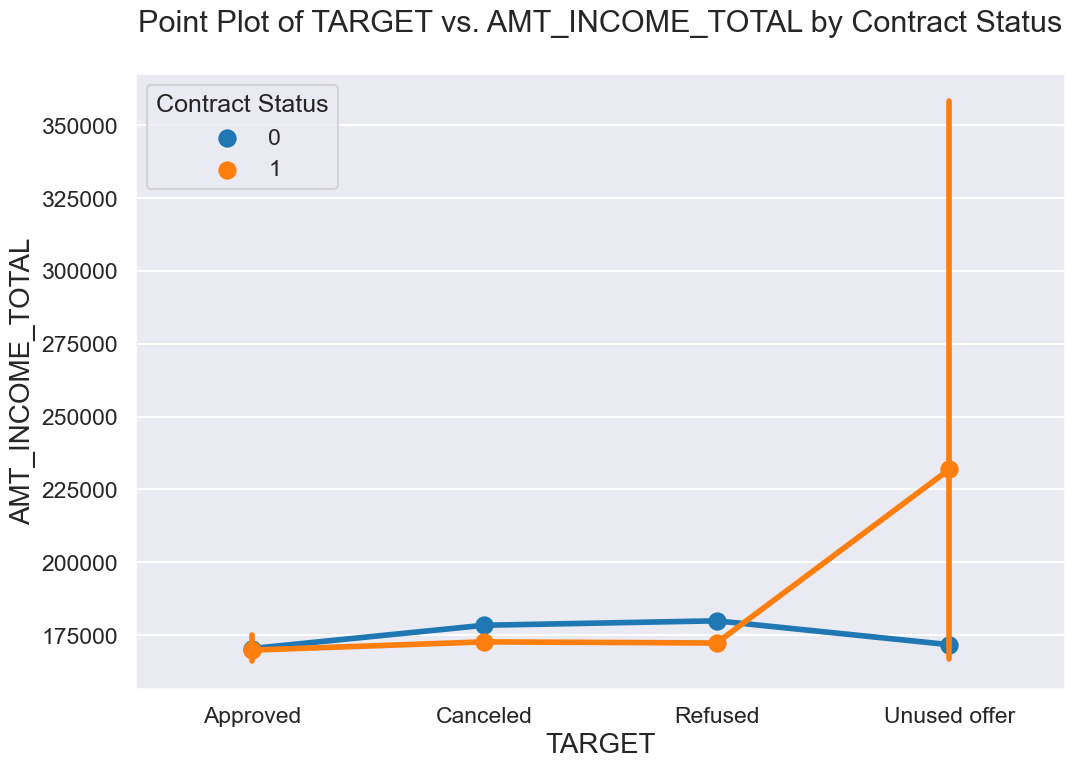

In [2172]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=df_final, x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL", hue="TARGET")

# Customize the plot
plt.title("Point Plot of TARGET vs. AMT_INCOME_TOTAL by Contract Status")
plt.xlabel("TARGET")
plt.ylabel("AMT_INCOME_TOTAL")
plt.legend(title="Contract Status")

# Show the plot
plt.show()

The point plot reveals an interesting trend. It indicates that individuals who have not used an offer earlier ("Unused offer" category in NAME_CONTRACT_STATUS) are more likely to default on their loans, even when their average income is higher compared to other contract status categories. This suggests that the history of not using previous loan offers may be a significant factor in predicting loan defaults, potentially even more important than income alone.

# 2:

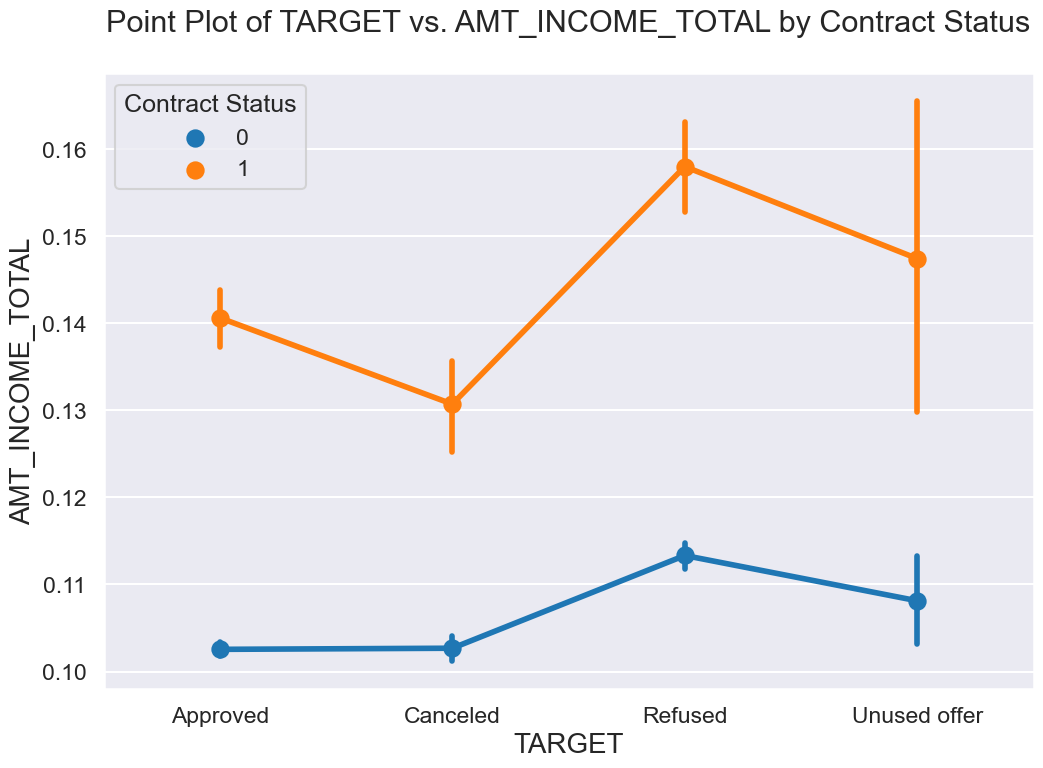

In [2175]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=df_final, x="NAME_CONTRACT_STATUS", y="DEF_60_CNT_SOCIAL_CIRCLE", hue="TARGET")

# Customize the plot
plt.title("Point Plot of TARGET vs. AMT_INCOME_TOTAL by Contract Status")
plt.xlabel("TARGET")
plt.ylabel("AMT_INCOME_TOTAL")
plt.legend(title="Contract Status")

# Show the plot
plt.show()

In [ ]:
df_final.AMT

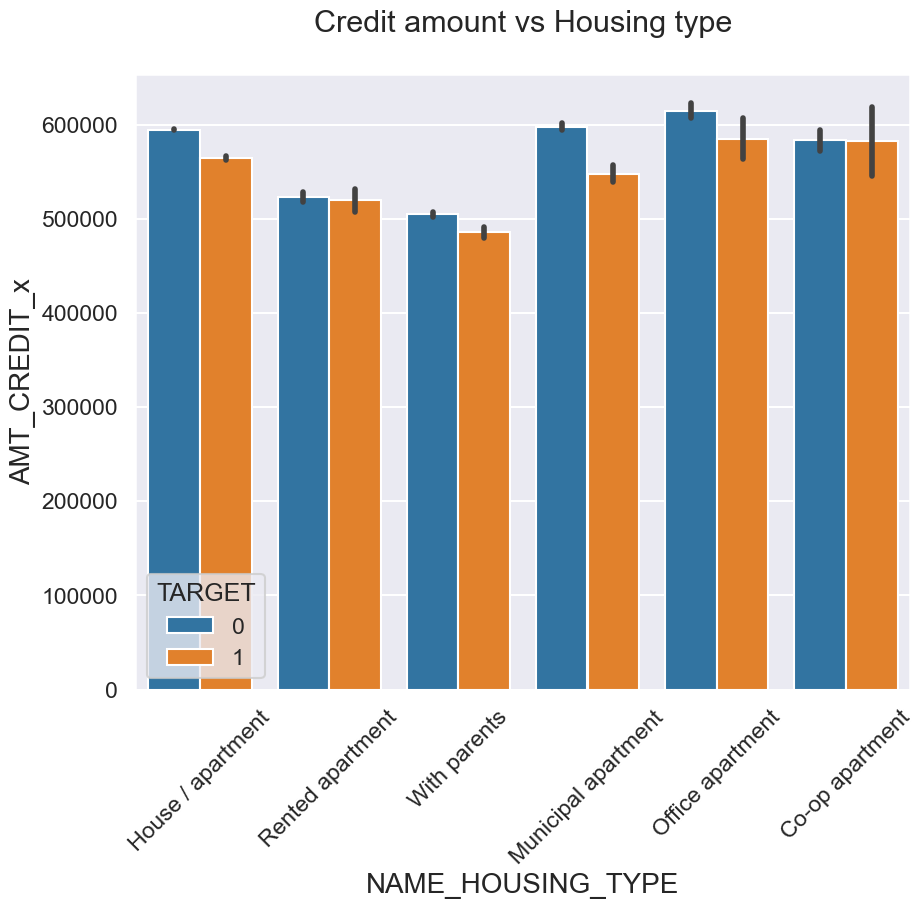

In [2246]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.barplot(data =df_final, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Credit amount vs Housing type')
plt.show()

**Housing Type Analysis:**

1. Among various housing types, "Office apartment" has a higher percentage of clients with target 0 (repaid loans) compared to other housing types, indicating a better repayment rate for this category.

2. Conversely, "Co-op apartment" exhibits a higher percentage of clients with target 1 (defaulted loans), suggesting a higher credit risk associated with this housing type.

3. Based on this analysis, it is advisable for the bank to exercise caution when granting loans to clients with "Co-op apartment" housing type due to their higher likelihood of payment difficulties.

4. To mitigate risk and improve loan repayment rates, the bank can focus its lending efforts on housing types such as "With parents," "House/apartment," or "Municipal apartment," which appear to have a better track record of successful payments.



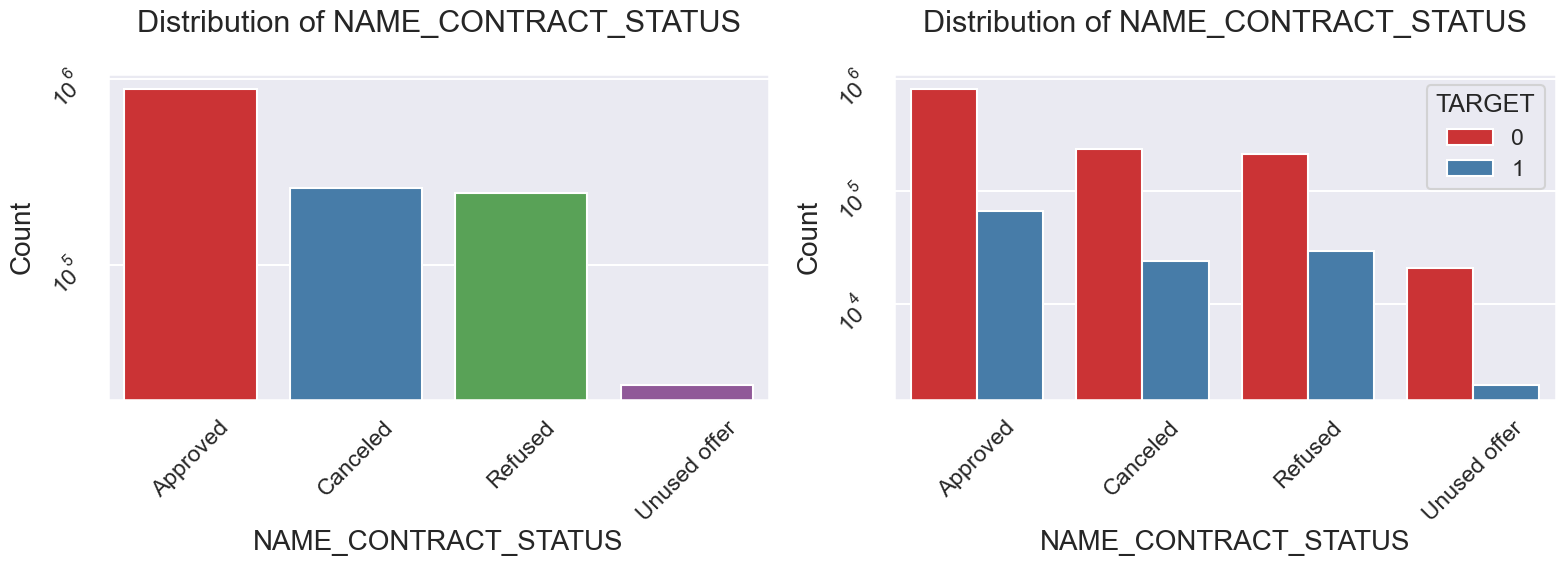

In [2245]:
plot_categorical_distributions_side_by_side(df_final, 'NAME_CONTRACT_STATUS',"NAME_CONTRACT_STATUS")

**Observations on Previous Client Behavior:**

1. Clients who had previously canceled their loan applications demonstrated a positive repayment behavior in the current case. Adjusting interest rates for these clients could potentially lead to increased business opportunities.

2. Similarly, clients who were previously refused a loan have shown a favorable repayment trend in the current scenario. It is advisable to record the reasons for their initial loan refusal, as these clients may become potential reliable borrowers in the future.



# Key Factors for Successful Repayments

- **Education Matters:** Applicants holding academic degrees exhibit a significantly lower default rate.

- **Income Diversity:** Individuals in various income-generating roles, such as students and businessmen, demonstrate a strong repayment record.

- **Regional Influence:** The geographical rating, specifically the top-rated region, is linked with safer loan repayment behavior.

- **Occupational Insights:** Applicants affiliated with certain professional sectors like Trade Types 4 and 5, or Industry Type 8, tend to default less frequently.

- **Age Advantage:** Loan applicants above the age of 50 exhibit a lower tendency to default.

- **Seasoned Employment:** Clients with over four decades of work experience have a default rate of under 1%.

- **Financial Strength:** Applicants with incomes exceeding 10 Millionsexperience a lower likelihood of default.

- **Loan Purpose Precision:** Loans designated for hobbies or garage purchases demonstrate higher repayment reliability.

- **Family Influence:** Clients with fewer dependents, ranging from zero to two children, consistently honor their loan commitments.

# Significant Indicators of Default Behavior

- **Gender Dynamics:** Male applicants are more prone to default, indicating a gender-based trend.

- **Marital Status Matters:** Individuals in civil marriages or single status exhibit a higher default rate.

- **Educational Influence:** Those with lower secondary or secondary education backgrounds face a greater risk of default.

- **Income Anomalies:** Clients on maternity leave or experiencing unemployment tend to have a higher likelihood of default.

- **Regional Risk:** Regions assigned a rating of 3 are associated with the highest default rates.

- **Occupational Hazard:** Certain job categories, such as low-skill laborers, drivers, waiters/barmen staff, security staff, laborers, and cooking staff, carry a higher risk of default.

- **Youthful Tendencies:** Younger applicants aged between 20-40 face a comparatively higher probability of default.

- **Work Experience Variable:** Clients with less than five years of employment history exhibit an elevated default rate.

- **Family Size Influence:** Clients with larger families or more children tend to have higher default rates.

# Strategic Loan Approval Considerations

- **Housing Insight:** Applicants residing in rented apartments or with their parents represent a significant portion of loan applicants. Offering loans to this group with slightly higher interest rates may help mitigate potential losses due to defaults.

- **Credit Range Caution:** Loans within the 300K-600K  range have shown a consistent default trend. Implementing elevated interest rates for this specific credit bracket could be advisable.

- **Income-Tiered Approach:** Given that around 90% of applicants have a total income of less than 300K , applying higher interest rates to loans for this demographic might help offset potential default risks.

- **Family Size Impact:** Clients with larger families (4-8 children) have demonstrated a high default rate, warranting the imposition of higher interest rates on their loans.

- **Loan Purpose Prudence:** Loans intended for repairs have exhibited the highest default rate. This aligns with the bank's cautious approach in the past, either rejecting such applications or offering loans at prohibitive interest rates. Maintaining this approach may be advisable in the future.

# Strategic Recommendations

- **Record Cancellation Reasons:** Investigate the reasons behind loan cancellations, as a significant proportion of previously canceled clients have repaid their loans. Understanding these reasons could open opportunities for renegotiating terms with these clients.

- **Reconsider Rejected Applicants:** Nearly 88% of clients previously rejected by the bank have become successful repayers. Documenting the reasons for rejection and revisiting these applicants could help mitigate business losses and expand lending opportunities.
